In [1]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 33.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 56.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install mlflow --user


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 80.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 137.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 545.5/545.5 kB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [51]:
import mlflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support,r2_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import defaultdict
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA

## Importing the Dataset

In [52]:
df=pd.read_csv('sampled_final_df.csv')
df_train=df.drop("isFraud",axis=1)
output_col=pd.DataFrame(df['isFraud'])

## Cleaning the dataset

In [53]:
df_train['CASH_IN']=df_train['CASH_IN'].map({True:1,False:0})
df_train['CASH_OUT']=df_train['CASH_OUT'].map({True:1,False:0})
df_train['DEBIT']=df_train['DEBIT'].map({True:1,False:0})
df_train['PAYMENT']=df_train['PAYMENT'].map({True:1,False:0})
df_train['TRANSFER']=df_train['TRANSFER'].map({True:1,False:0})


In [54]:
df_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,563,18417.240320,18417.240320,0.00,1.240395e+04,1.551259e+04,0,0,1,0,0,1,209519,2572822
1,419,346354.615847,346354.615847,0.00,0.000000e+00,3.463546e+05,0,0,1,0,0,0,403995,6311127
2,229,291590.310000,6049.000000,0.00,2.497772e+04,3.165680e+05,0,0,1,0,0,0,482160,3861560
3,418,66777.824054,66777.824054,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,351115,1371643
4,379,678.130000,45082.000000,44403.87,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2184529,5689466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50824,244,717917.637444,717917.637444,0.00,1.174964e+07,1.246756e+07,0,0,1,0,0,0,370174,4423416
50825,378,302.460000,792.000000,489.54,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2151612,1769882
50826,190,11327.270000,10303.000000,0.00,0.000000e+00,0.000000e+00,0,0,0,0,1,0,1204550,6093817
50827,512,264334.474702,264334.474702,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,422565,1356128


In [55]:
df_train.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN               int64
CASH_OUT              int64
DEBIT                 int64
PAYMENT               int64
TRANSFER              int64
nameDest_encoded      int64
nameOrig_encoded      int64
dtype: object

In [56]:
df_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,563,18417.240320,18417.240320,0.00,1.240395e+04,1.551259e+04,0,0,1,0,0,1,209519,2572822
1,419,346354.615847,346354.615847,0.00,0.000000e+00,3.463546e+05,0,0,1,0,0,0,403995,6311127
2,229,291590.310000,6049.000000,0.00,2.497772e+04,3.165680e+05,0,0,1,0,0,0,482160,3861560
3,418,66777.824054,66777.824054,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,351115,1371643
4,379,678.130000,45082.000000,44403.87,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2184529,5689466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50824,244,717917.637444,717917.637444,0.00,1.174964e+07,1.246756e+07,0,0,1,0,0,0,370174,4423416
50825,378,302.460000,792.000000,489.54,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2151612,1769882
50826,190,11327.270000,10303.000000,0.00,0.000000e+00,0.000000e+00,0,0,0,0,1,0,1204550,6093817
50827,512,264334.474702,264334.474702,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,422565,1356128


In [57]:
df_train.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN               int64
CASH_OUT              int64
DEBIT                 int64
PAYMENT               int64
TRANSFER              int64
nameDest_encoded      int64
nameOrig_encoded      int64
dtype: object

In [58]:
df_train.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
count,50829.000000,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,5.082900e+04,5.082900e+04
mean,305.693384,2.129561e+05,5.368273e+05,4.270252e+05,1.019196e+06,1.191137e+06,0.000393,0.110213,0.552952,0.003443,0.167208,0.227882,5.139591e+05,3.150544e+06
std,173.018394,4.760683e+05,2.069521e+06,2.104247e+06,3.522850e+06,3.708267e+06,0.019833,0.313158,0.497193,0.058576,0.373165,0.419470,5.885310e+05,1.838557e+06
min,1.000000,9.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+00,2.600000e+01
25%,181.000000,2.783538e+04,1.048624e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.769170e+05,1.555214e+06
50%,298.000000,1.057949e+05,6.282000e+04,0.000000e+00,3.767953e+04,2.428489e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.398270e+05,3.136695e+06
75%,404.000000,2.524101e+05,2.423399e+05,0.000000e+00,7.413421e+05,9.817932e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.056420e+05,4.752738e+06
max,742.000000,5.072328e+07,3.187613e+07,3.205108e+07,2.355353e+08,2.358797e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.721968e+06,6.352414e+06


In [59]:
categorical_columns=df_train.select_dtypes(exclude=np.number).columns
numerical_columns=df_train.select_dtypes(include=np.number).columns


## Exploratory Data Analysis


### 1. First step is to see the type of columns so that we could conclude that even now some columns needs to be appropriated.


In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50829 entries, 0 to 50828
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   step              50829 non-null  int64  
 1   amount            50829 non-null  float64
 2   oldbalanceOrg     50829 non-null  float64
 3   newbalanceOrig    50829 non-null  float64
 4   oldbalanceDest    50829 non-null  float64
 5   newbalanceDest    50829 non-null  float64
 6   isFlaggedFraud    50829 non-null  int64  
 7   CASH_IN           50829 non-null  int64  
 8   CASH_OUT          50829 non-null  int64  
 9   DEBIT             50829 non-null  int64  
 10  PAYMENT           50829 non-null  int64  
 11  TRANSFER          50829 non-null  int64  
 12  nameDest_encoded  50829 non-null  int64  
 13  nameOrig_encoded  50829 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 5.4 MB


### 2. NULL Values . First step is to see the Null Values


In [61]:
df_train.isnull().sum()

step                0
amount              0
oldbalanceOrg       0
newbalanceOrig      0
oldbalanceDest      0
newbalanceDest      0
isFlaggedFraud      0
CASH_IN             0
CASH_OUT            0
DEBIT               0
PAYMENT             0
TRANSFER            0
nameDest_encoded    0
nameOrig_encoded    0
dtype: int64

<Axes: >

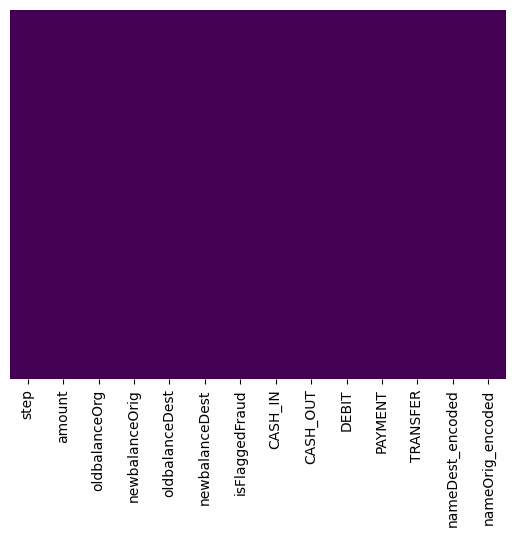

In [62]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### 3. Next step is to see the collinearity. We will use the spearman correlation since even if the dataset is spreaded we can see the correlation very easily. We will also use the Variable Inflation Factor to see the that whether a independent column could be predicted using other independednt columns

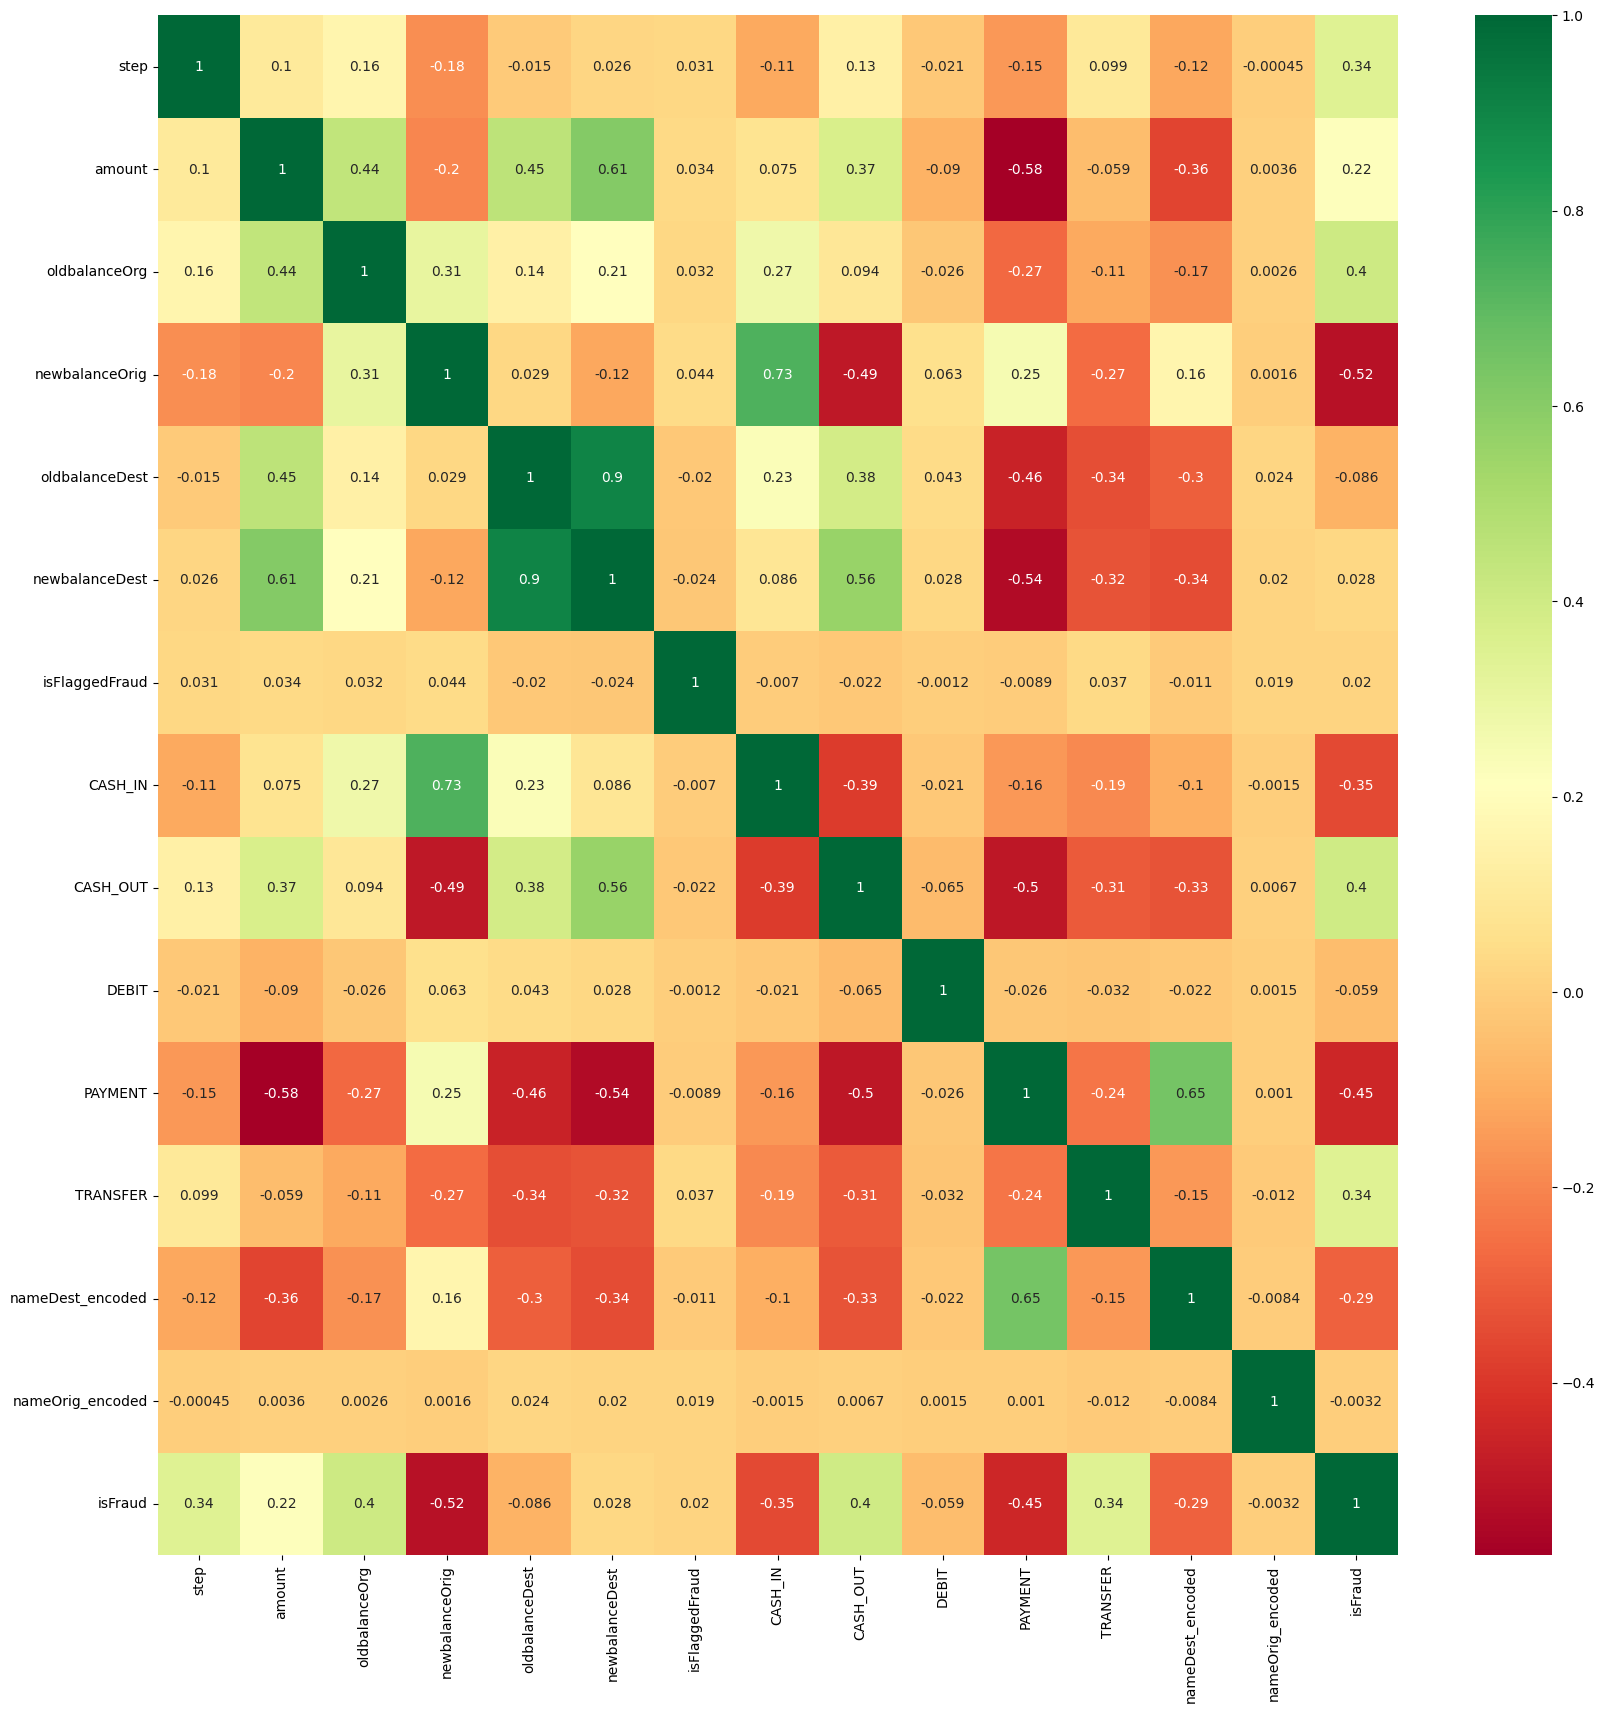

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.concat([df_train,output_col],axis=1).select_dtypes(include=np.number).corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

In [64]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



X = df_train.select_dtypes(include=np.number)
calc_vif(X)

,Variables,VIF
0,step,3.983052
1,amount,4.781047
2,oldbalanceOrg,93.099080
3,newbalanceOrig,95.589279
4,oldbalanceDest,115.344272
5,newbalanceDest,128.855338
6,isFlaggedFraud,1.076938
7,CASH_IN,2.283259
8,CASH_OUT,3.867847
9,DEBIT,1.016719


### 4. Next step is to see the outliers.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

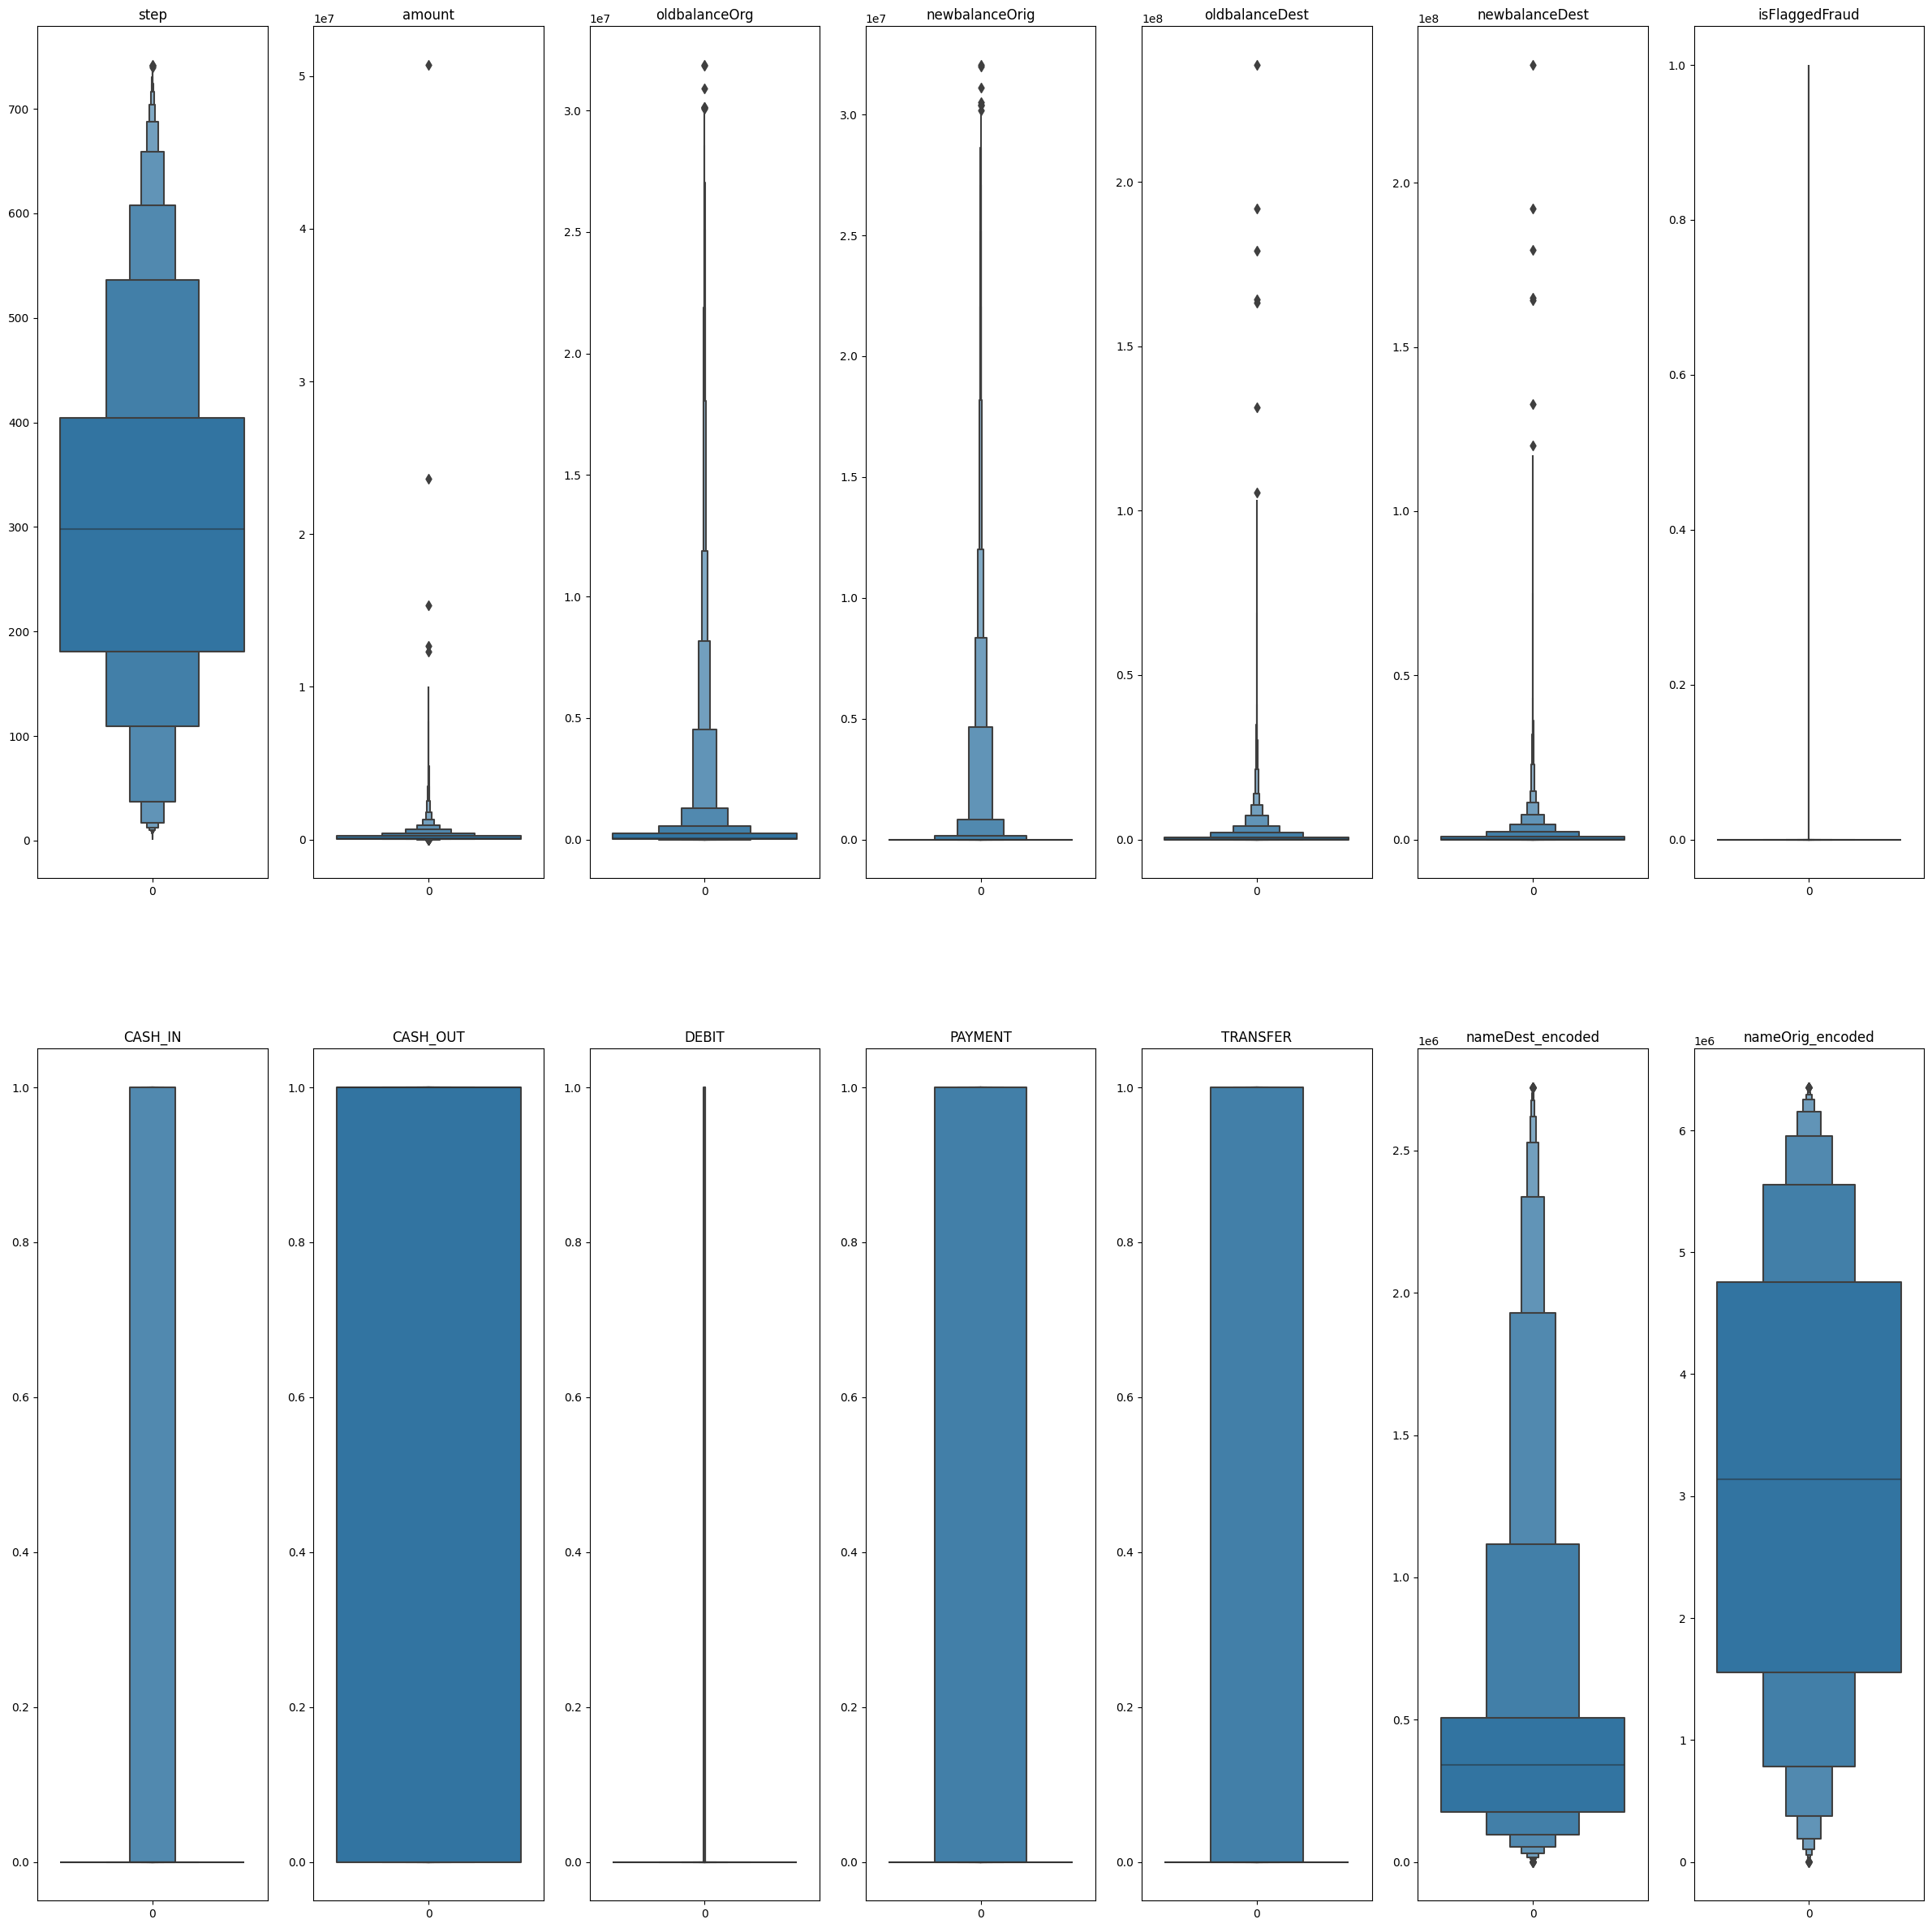

In [65]:
fig, axes = plt.subplots(nrows = 2, ncols = 7)   
axes = axes.flatten()        
fig.set_size_inches(30,30)

for ax, col in zip(axes, numerical_columns):
    print()
    sns.boxenplot(df_train[col], ax = ax)
    ax.set_title(col)

### 5. Next step is to see the density


In [66]:
range(len(df_train))


range(0, 50829)

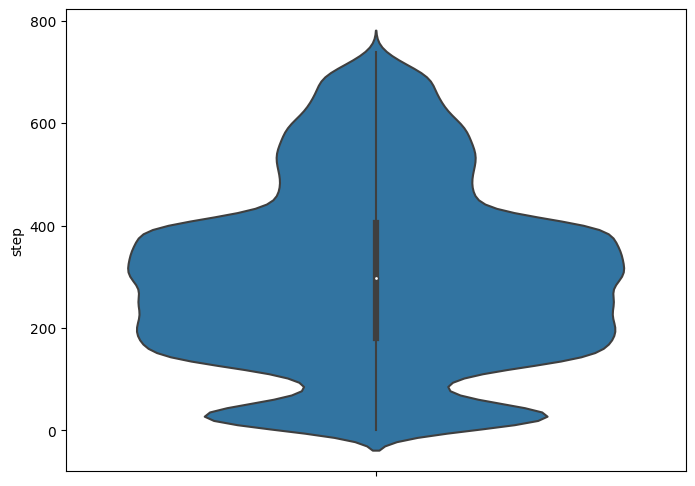

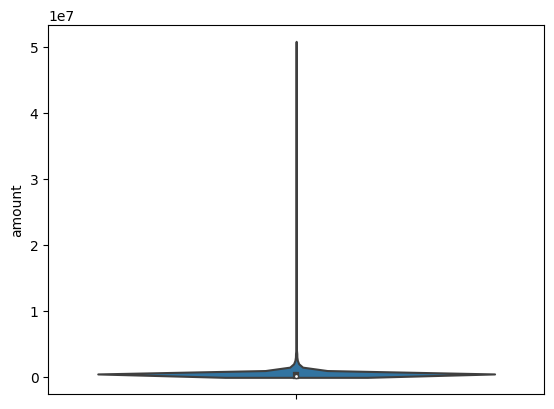

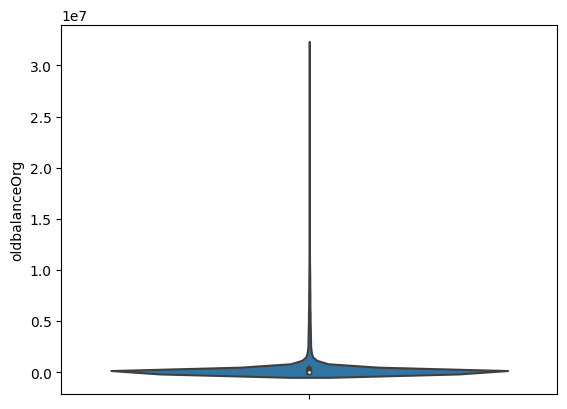

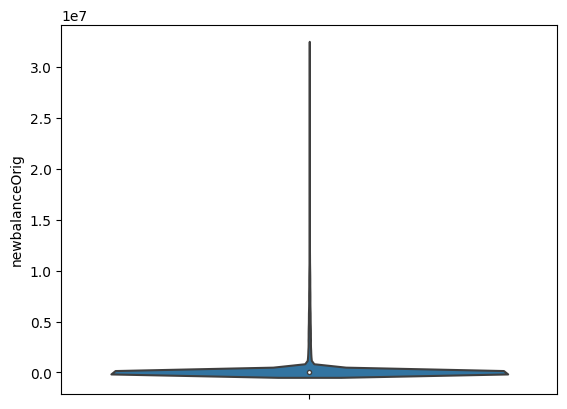

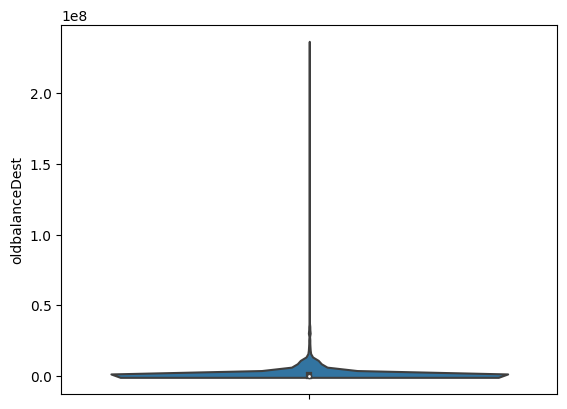

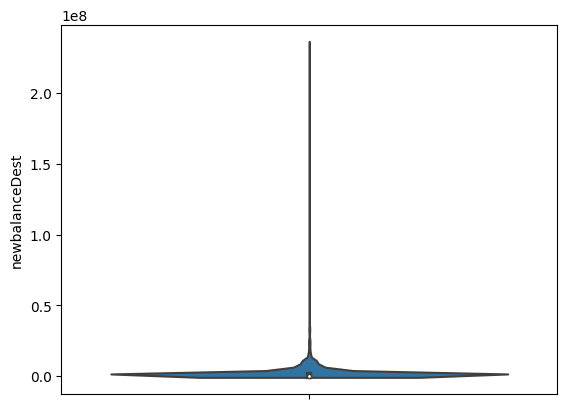

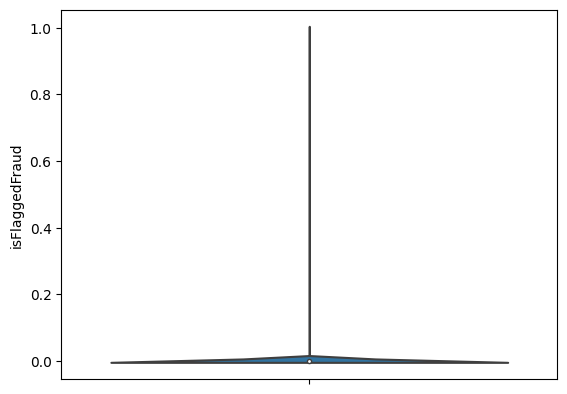

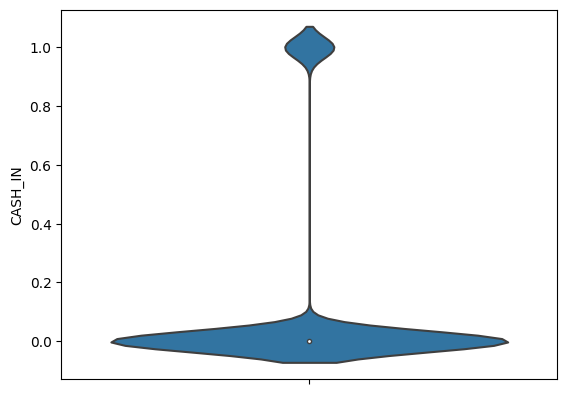

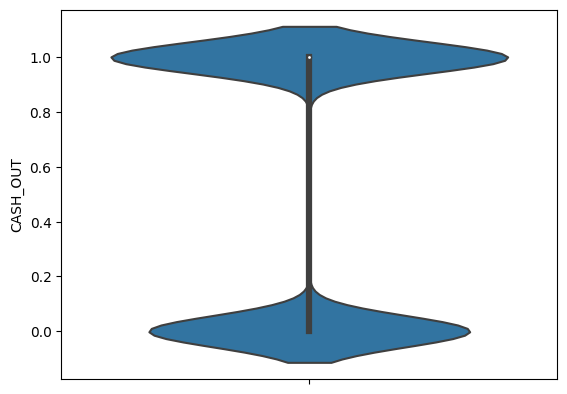

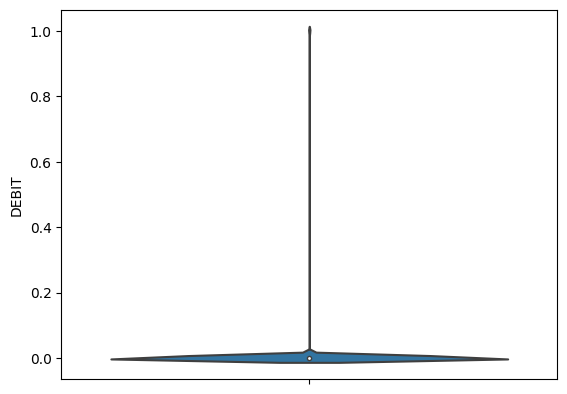

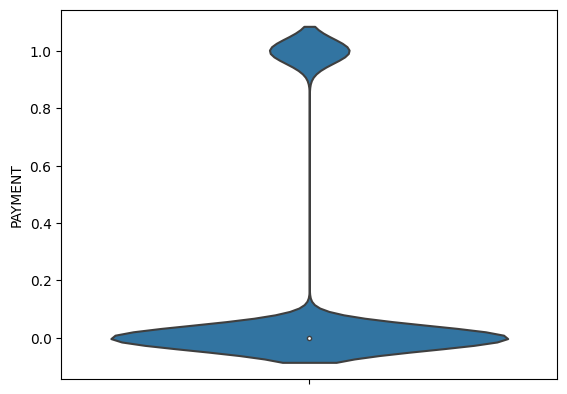

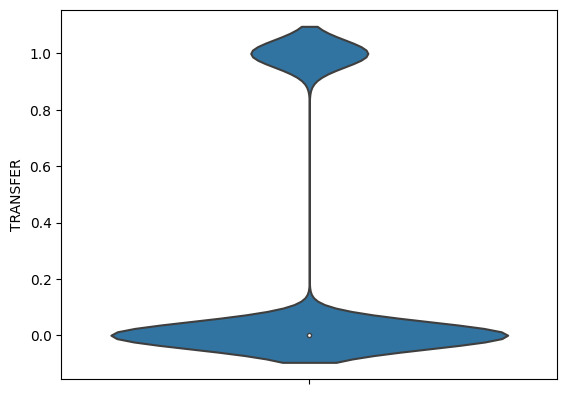

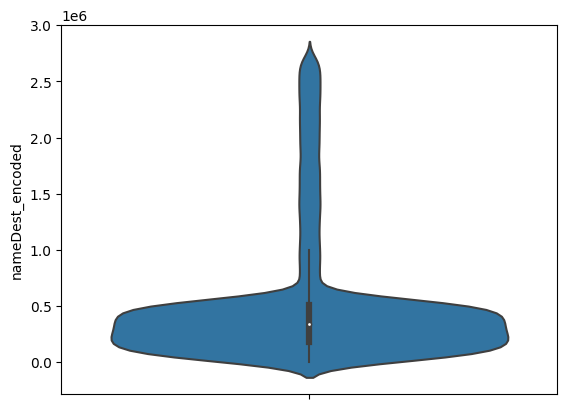

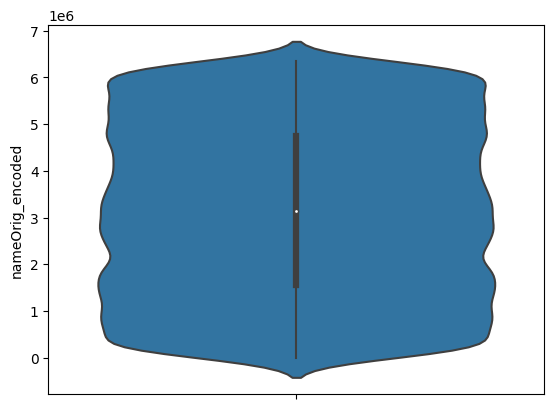

In [67]:
l=  []
for i in range(len(df_train)):
    l.append(i)
#   Plot a violin plot for numerical vs categorical
plt.figure(figsize=(8, 6))
for col in numerical_columns:
    sns.violinplot(y=df_train[col])
    plt.show()

### 6. Next step is to see the distribution plot


/tmp/ipykernel_1409/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1409/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

/tmp/ipykernel_1409/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1409/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

/tmp/ipykernel_1409/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1409/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

/tmp/ipykernel_1409/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1409/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

/tmp/ipykernel_1409/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1409/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

/tmp/ipykernel_1409/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1409/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

/tmp/ipykernel_1409/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1409/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

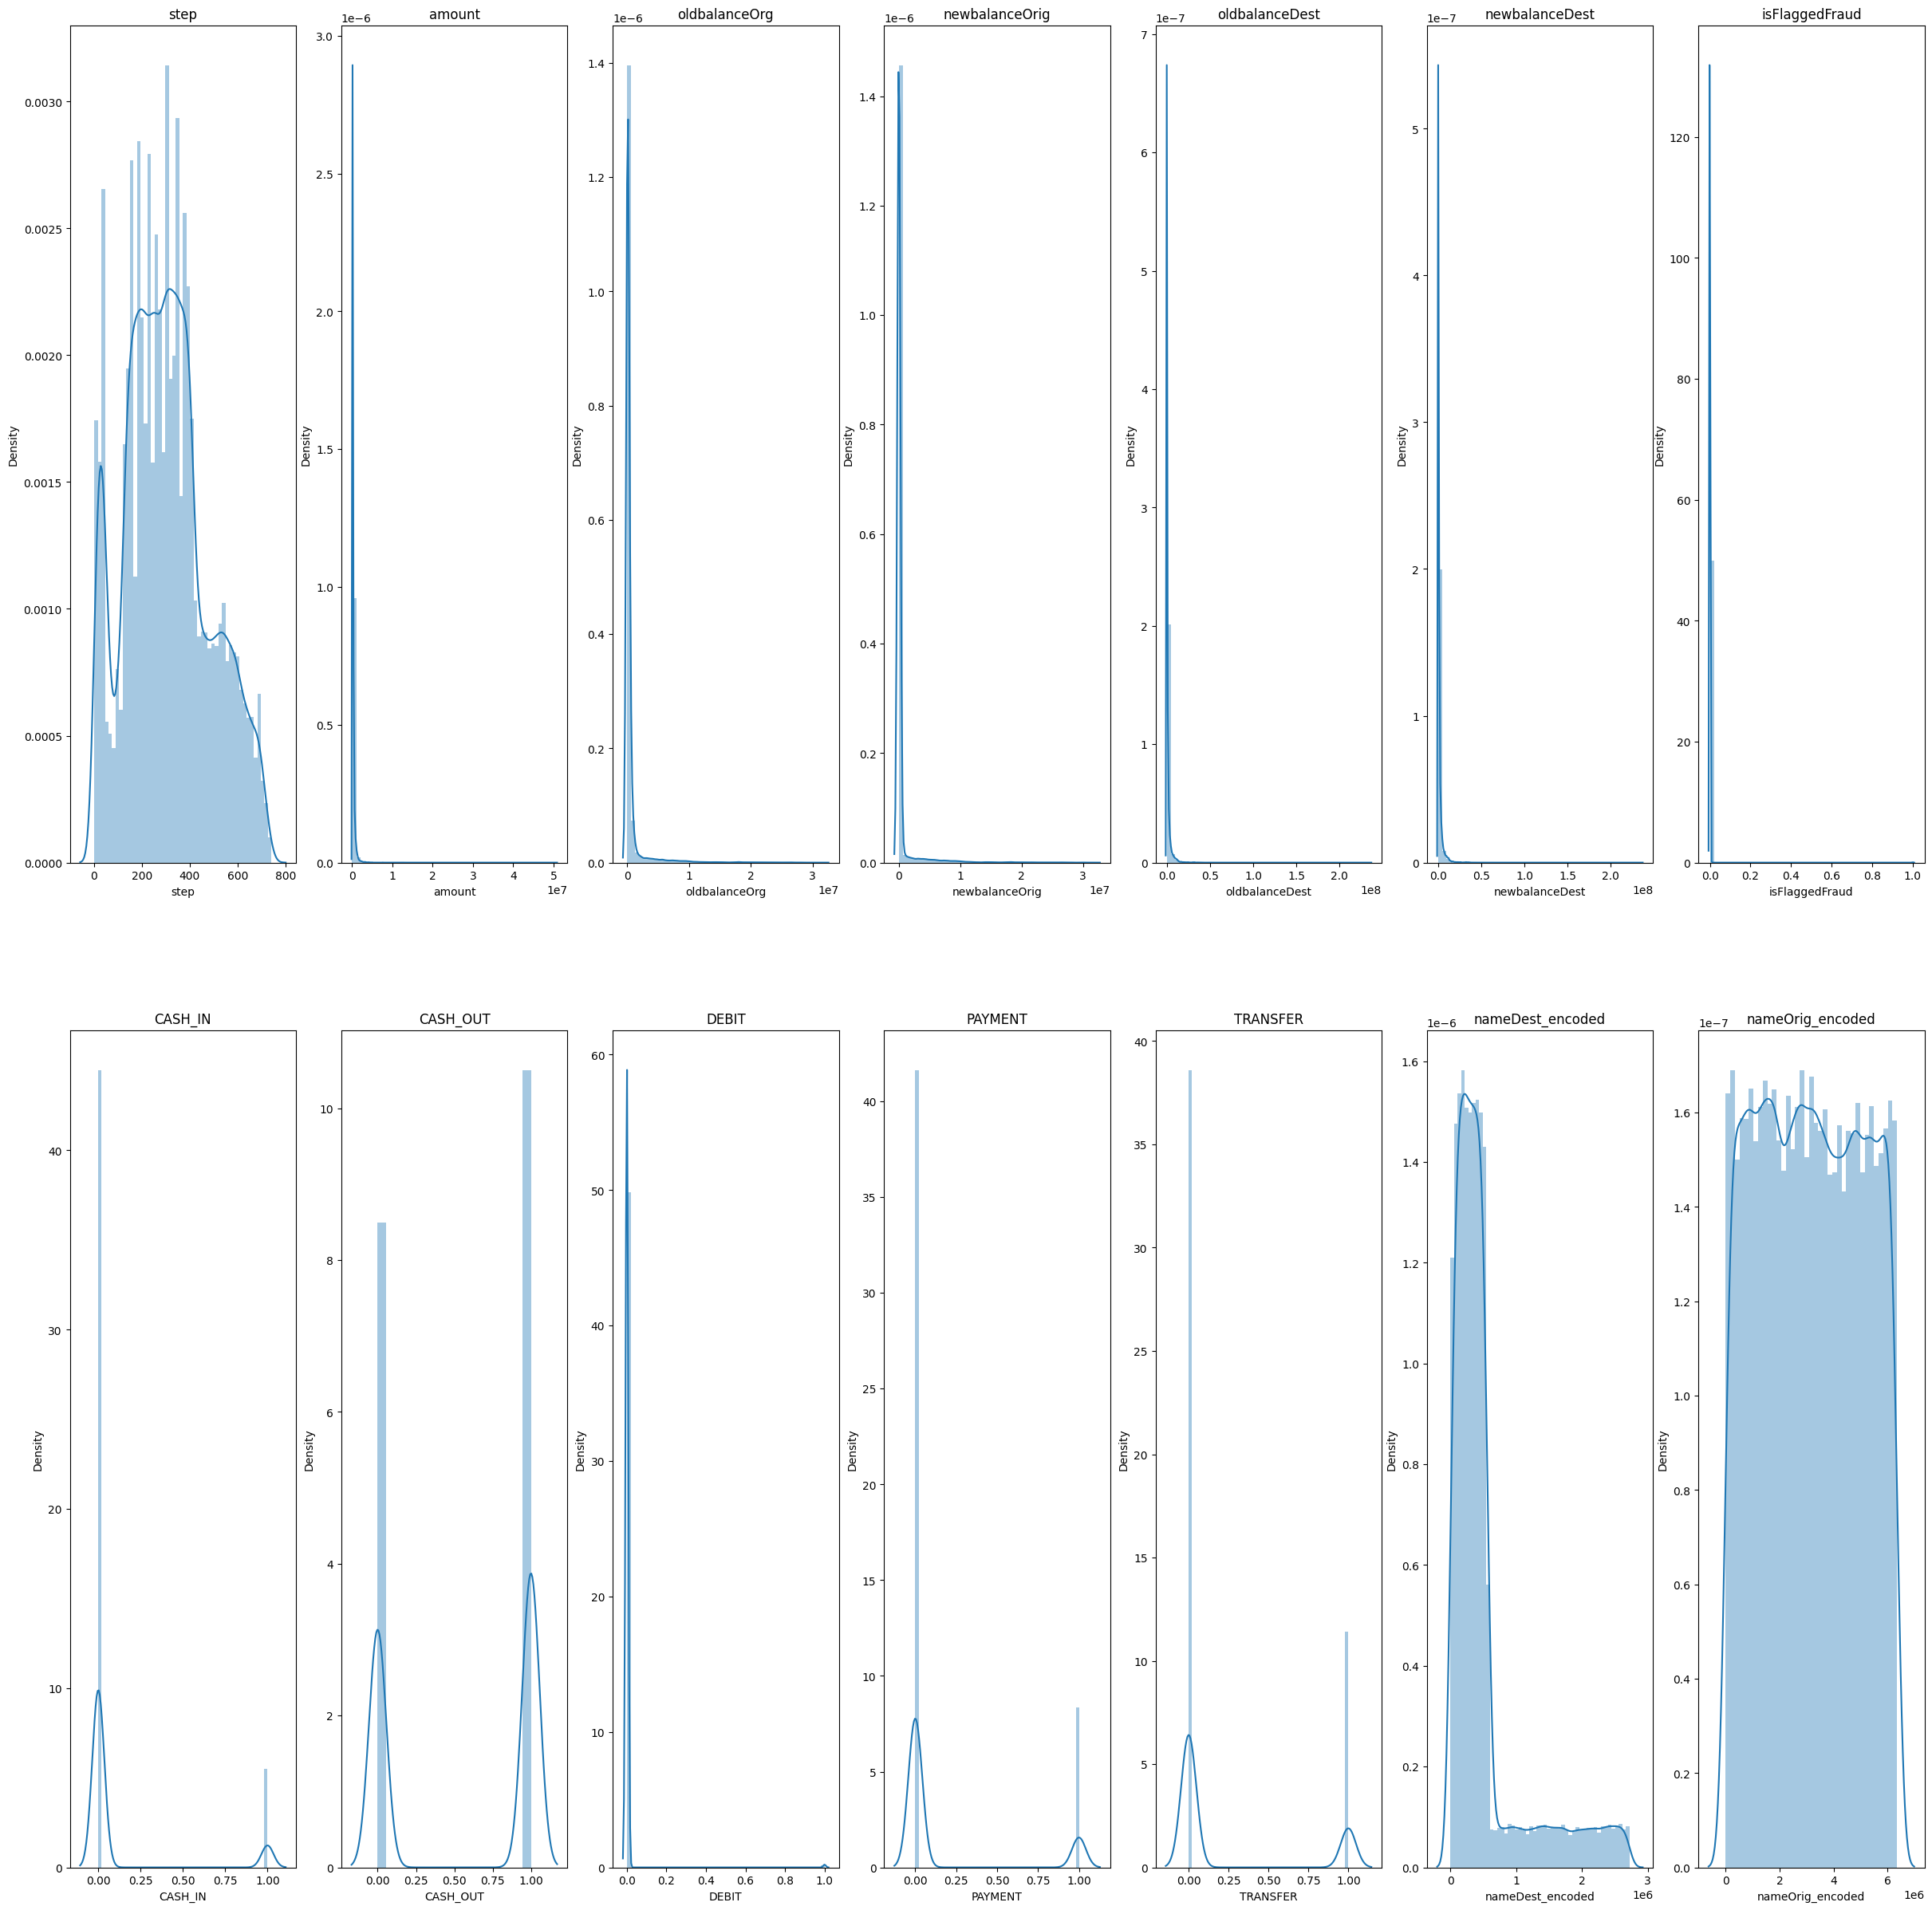

In [68]:
fig, axes = plt.subplots(nrows = 2, ncols = 7)   
axes = axes.flatten()        
fig.set_size_inches(30,30)

# cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, numerical_columns):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)

### 7. To get more clearity we also see the skewness in each of the numerical column


In [69]:
for col in numerical_columns:
    print(f" {df_train[col].skew() } in {col}")

 0.32907522436242387 in step
 32.68553090442 in amount
 7.542635502157765 in oldbalanceOrg
 7.525789126034026 in newbalanceOrig
 21.596917413135284 in oldbalanceDest
 19.9791308386168 in newbalanceDest
 50.38452366005486 in isFlaggedFraud
 2.4894972397745674 in CASH_IN
 -0.2130123782597912 in CASH_OUT
 16.954994847224686 in DEBIT
 1.7836909258082823 in PAYMENT
 1.2974895402177526 in TRANSFER
 2.181217674317024 in nameDest_encoded
 0.022616014163888646 in nameOrig_encoded


### 8. Next we see the count plot of each category i.e. basically the countplot


In [70]:
df.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN                bool
CASH_OUT               bool
DEBIT                  bool
PAYMENT                bool
TRANSFER               bool
nameDest_encoded      int64
nameOrig_encoded      int64
isFraud               int64
dtype: object

Text(0.5, 1.0, 'Count of categories in the label')

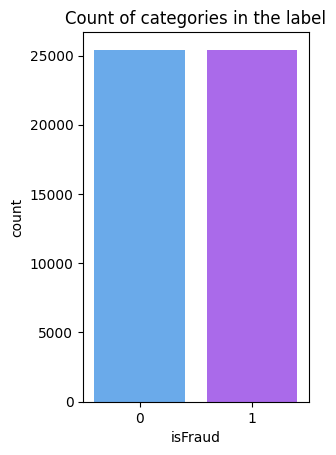

In [71]:
plt.subplot(1,2,1)
sns.countplot(x = 'isFraud' , palette= 'cool', data= output_col) 
plt.title("Count of categories in the label")

### 9. See the redundant values in a column


In [72]:
df_train[numerical_columns].describe(percentiles = [.25,.5,.75,.95,.97,.99])  


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
count,50829.000000,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,5.082900e+04,5.082900e+04
mean,305.693384,2.129561e+05,5.368273e+05,4.270252e+05,1.019196e+06,1.191137e+06,0.000393,0.110213,0.552952,0.003443,0.167208,0.227882,5.139591e+05,3.150544e+06
std,173.018394,4.760683e+05,2.069521e+06,2.104247e+06,3.522850e+06,3.708267e+06,0.019833,0.313158,0.497193,0.058576,0.373165,0.419470,5.885310e+05,1.838557e+06
min,1.000000,9.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+00,2.600000e+01
25%,181.000000,2.783538e+04,1.048624e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.769170e+05,1.555214e+06
50%,298.000000,1.057949e+05,6.282000e+04,0.000000e+00,3.767953e+04,2.428489e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.398270e+05,3.136695e+06
75%,404.000000,2.524101e+05,2.423399e+05,0.000000e+00,7.413421e+05,9.817932e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.056420e+05,4.752738e+06
95%,627.000000,7.440183e+05,2.080911e+06,2.005502e+06,4.880836e+06,5.332377e+06,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.093464e+06,6.044182e+06
97%,660.000000,9.647865e+05,4.753570e+06,4.889036e+06,7.325888e+06,7.746684e+06,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.354664e+06,6.161653e+06
99%,697.000000,1.575369e+06,1.025901e+07,1.044295e+07,1.235383e+07,1.294601e+07,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.597296e+06,6.281850e+06


## Modification on the basis of EDA


### 1. Appropriation 

### 2. NULL values



### 3. Removing the most correlated column


In [73]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



X = df_train.select_dtypes(include=np.number)
df_vif=calc_vif(X)
df_vif

,Variables,VIF
0,step,3.983052
1,amount,4.781047
2,oldbalanceOrg,93.099080
3,newbalanceOrig,95.589279
4,oldbalanceDest,115.344272
5,newbalanceDest,128.855338
6,isFlaggedFraud,1.076938
7,CASH_IN,2.283259
8,CASH_OUT,3.867847
9,DEBIT,1.016719


In [74]:
df_vif.dtypes

Variables     object
VIF          float64
dtype: object

In [75]:
df_vif[(df_vif['VIF'] < 0.25) | (df_vif['VIF'] > 4)]

,Variables,VIF
1,amount,4.781047
2,oldbalanceOrg,93.099080
3,newbalanceOrig,95.589279
4,oldbalanceDest,115.344272
5,newbalanceDest,128.855338
10,PAYMENT,6.566721
12,nameDest_encoded,6.879791


In [76]:
most_correlated_cols=list(df_vif[(df_vif['VIF'] < 0.25) | (df_vif['VIF'] > 4)]['Variables'].values)
most_correlated_cols

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'PAYMENT',
 'nameDest_encoded']

In [77]:
new_cols=['oldbalanceDest','newbalanceDest','oldbalanceOrg','newbalanceOrig']

In [78]:
df_train.drop(new_cols,axis=1,inplace=True)
df_train

,step,amount,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,563,18417.240320,0,0,1,0,0,1,209519,2572822
1,419,346354.615847,0,0,1,0,0,0,403995,6311127
2,229,291590.310000,0,0,1,0,0,0,482160,3861560
3,418,66777.824054,0,0,0,0,0,1,351115,1371643
4,379,678.130000,0,0,0,0,1,0,2184529,5689466
...,...,...,...,...,...,...,...,...,...,...
50824,244,717917.637444,0,0,1,0,0,0,370174,4423416
50825,378,302.460000,0,0,0,0,1,0,2151612,1769882
50826,190,11327.270000,0,0,0,0,1,0,1204550,6093817
50827,512,264334.474702,0,0,0,0,0,1,422565,1356128


### 4. Removing the Outliers

In [79]:
df_train.select_dtypes(include=np.number).columns


Index(['step', 'amount', 'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT',
       'PAYMENT', 'TRANSFER', 'nameDest_encoded', 'nameOrig_encoded'],
      dtype='object')

In [80]:
cols=df_train.select_dtypes(include=np.number).columns
for col in cols:
    print(f"Mode in {col} col is:")
    print(df_train[col].mode().values[0])
    print()

Mode in step col is:
307

Mode in amount col is:
10000000.0

Mode in isFlaggedFraud col is:
0

Mode in CASH_IN col is:
0

Mode in CASH_OUT col is:
1

Mode in DEBIT col is:
0

Mode in PAYMENT col is:
0

Mode in TRANSFER col is:
0

Mode in nameDest_encoded col is:
78924

Mode in nameOrig_encoded col is:
47675



In [81]:
cols=df_train.select_dtypes(include=np.number).columns
for col in cols:
    print(f"Median in {col} col is:")
    print(df_train[col].median())
    print()

Median in step col is:
298.0

Median in amount col is:
105794.85

Median in isFlaggedFraud col is:
0.0

Median in CASH_IN col is:
0.0

Median in CASH_OUT col is:
1.0

Median in DEBIT col is:
0.0

Median in PAYMENT col is:
0.0

Median in TRANSFER col is:
0.0

Median in nameDest_encoded col is:
339827.0

Median in nameOrig_encoded col is:
3136695.0



In [82]:
# Outlier imputing by median
cols=df_train.select_dtypes(include=np.number).columns


for col in cols:
    q1=df_train[col].quantile(0.25)
    q3=df_train[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    h=q3+1.5*iqr
    print("[",l,",",h,"]")
    value=df_train[col].median()
    df_train[col] = np.where((df_train[col] < l) | (df_train[col] > h), value, df_train[col])


[ -153.5 , 738.5 ]
[ -309026.734281777 , 589272.2368402507 ]
[ 0.0 , 0.0 ]
[ 0.0 , 0.0 ]
[ -1.5 , 2.5 ]
[ 0.0 , 0.0 ]
[ 0.0 , 0.0 ]
[ 0.0 , 0.0 ]
[ -316170.5 , 998729.5 ]
[ -3241072.0 , 9549024.0 ]


In [83]:
df_train  

,step,amount,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,563.0,18417.240320,0.0,0.0,1.0,0.0,0.0,0.0,209519.0,2572822.0
1,419.0,346354.615847,0.0,0.0,1.0,0.0,0.0,0.0,403995.0,6311127.0
2,229.0,291590.310000,0.0,0.0,1.0,0.0,0.0,0.0,482160.0,3861560.0
3,418.0,66777.824054,0.0,0.0,0.0,0.0,0.0,0.0,351115.0,1371643.0
4,379.0,678.130000,0.0,0.0,0.0,0.0,0.0,0.0,339827.0,5689466.0
...,...,...,...,...,...,...,...,...,...,...
50824,244.0,105794.850000,0.0,0.0,1.0,0.0,0.0,0.0,370174.0,4423416.0
50825,378.0,302.460000,0.0,0.0,0.0,0.0,0.0,0.0,339827.0,1769882.0
50826,190.0,11327.270000,0.0,0.0,0.0,0.0,0.0,0.0,339827.0,6093817.0
50827,512.0,264334.474702,0.0,0.0,0.0,0.0,0.0,0.0,422565.0,1356128.0


/tmp/ipykernel_1409/2362376024.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1409/2362376024.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histogram

/tmp/ipykernel_1409/2362376024.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipykernel_1409/2362376024.py

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipykernel_1409/2362376024.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-pa

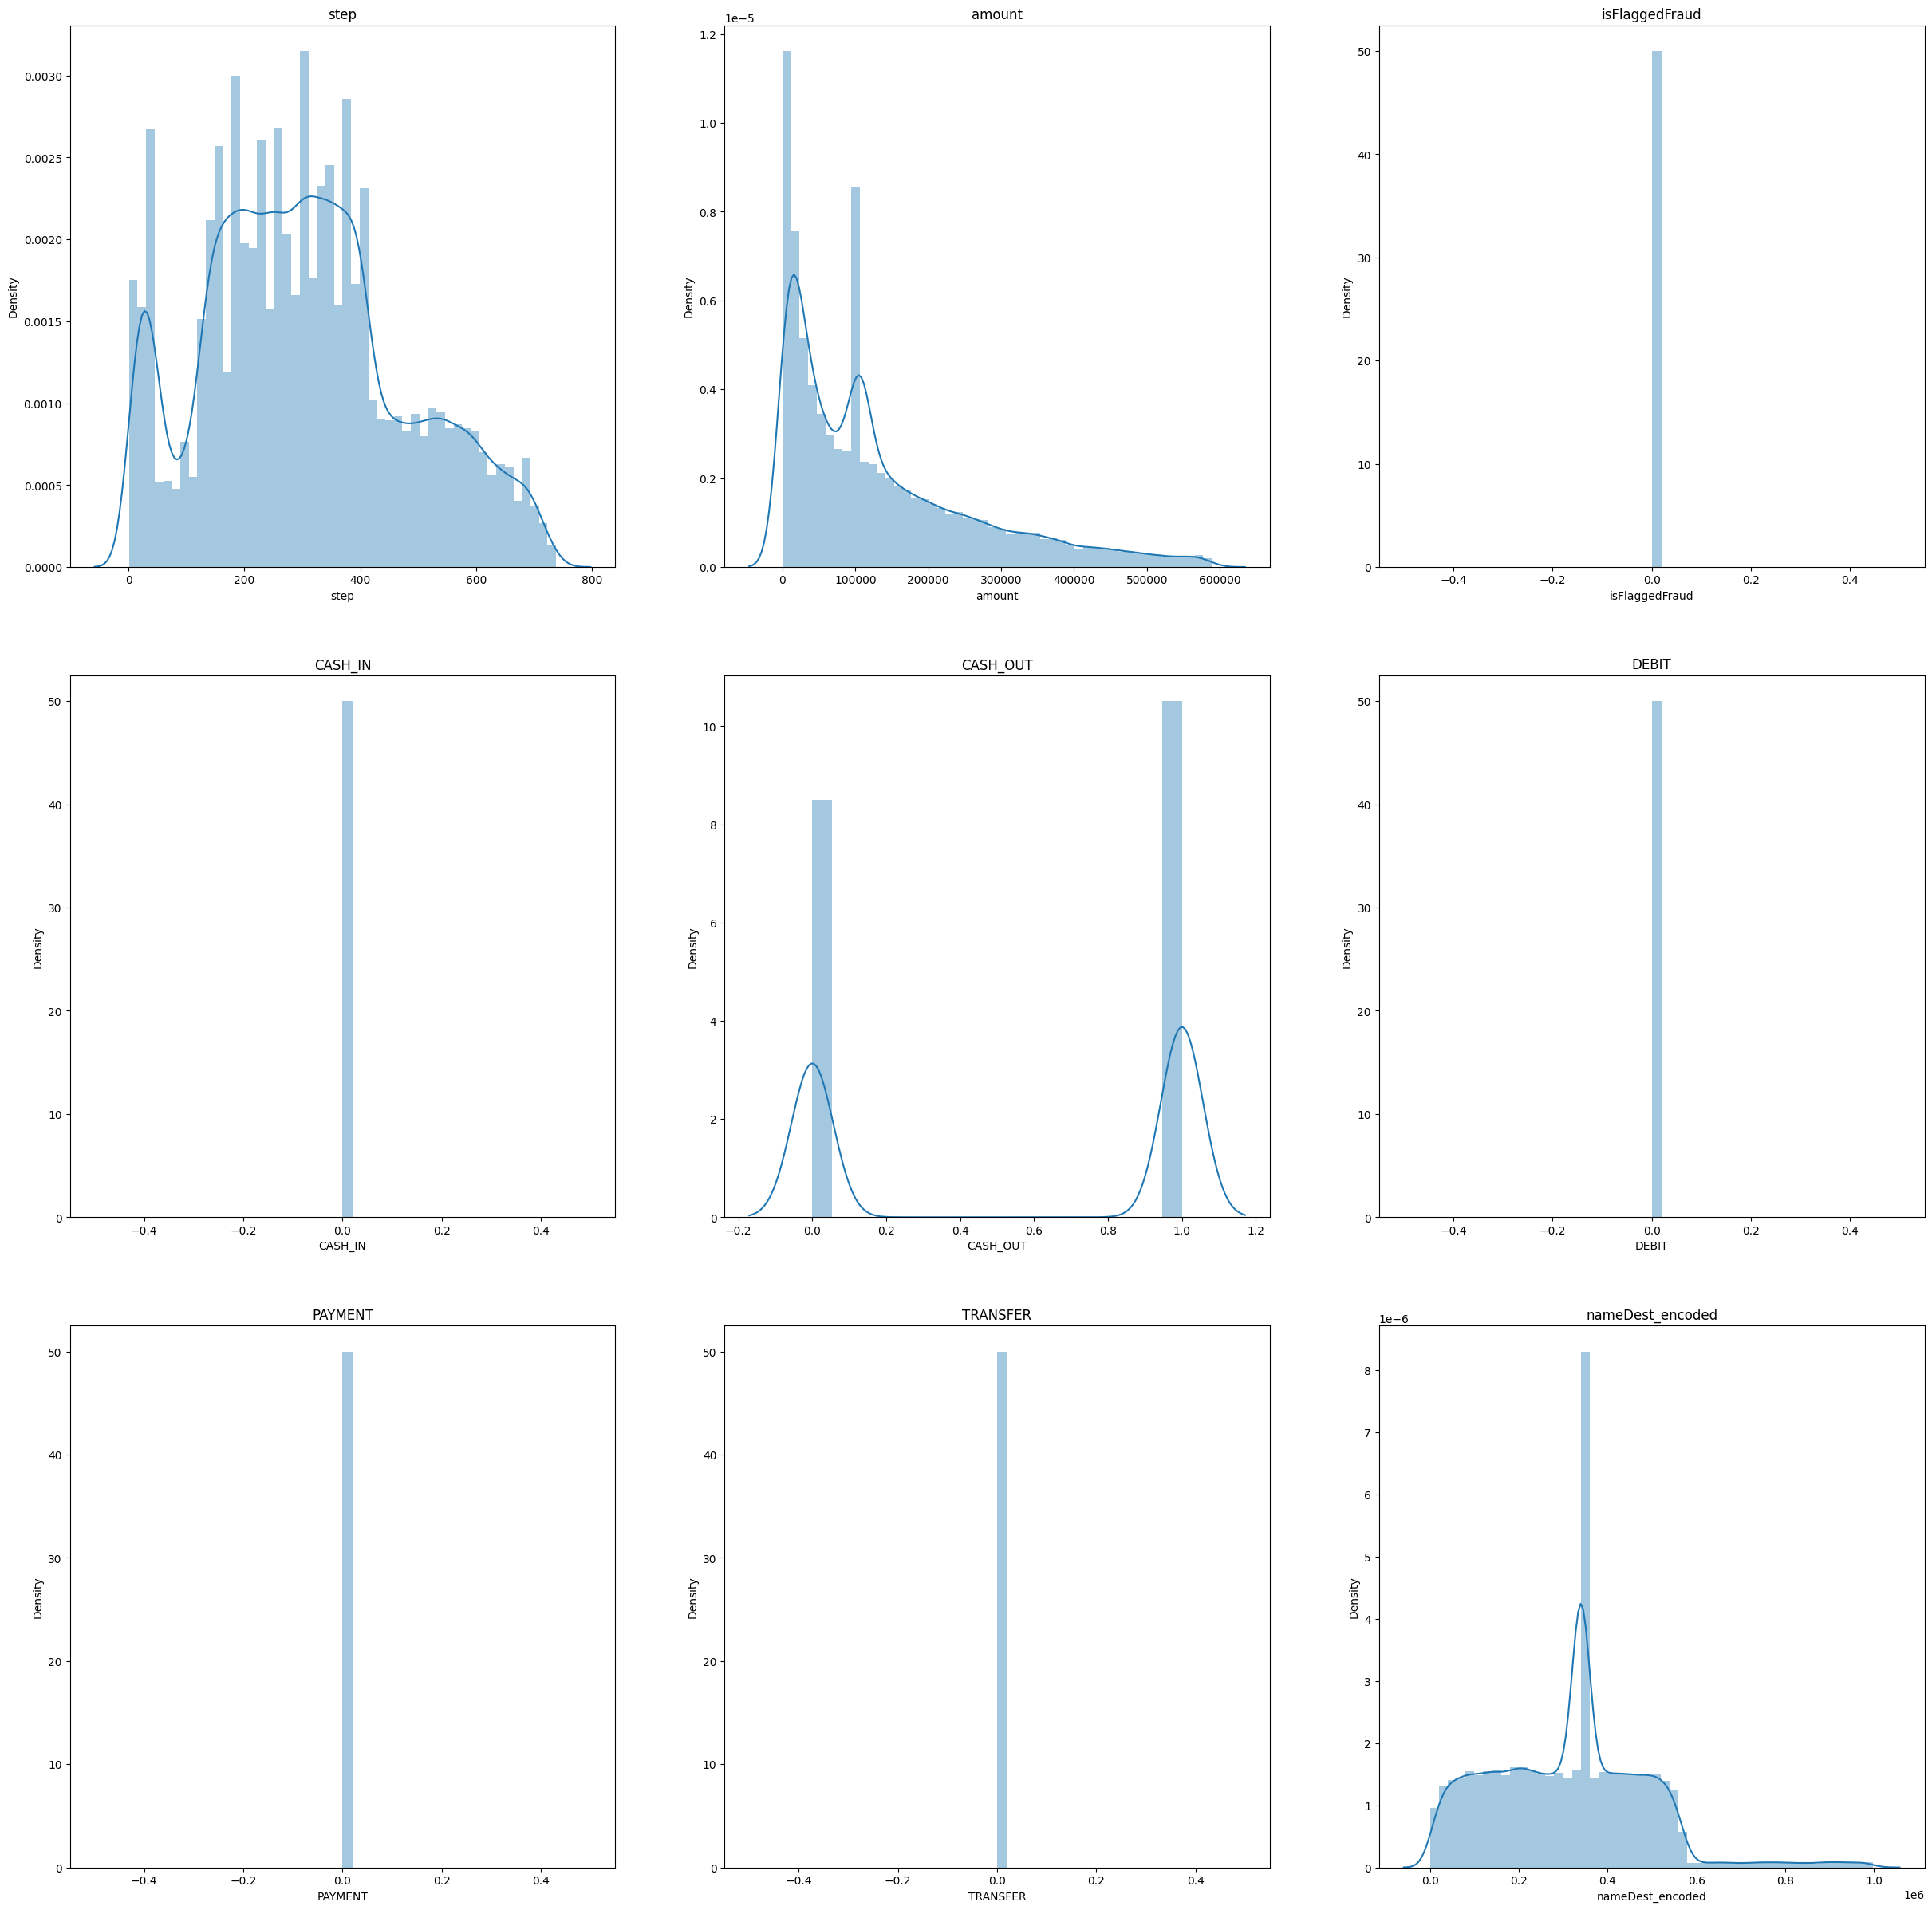

In [84]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    # axes is 2d array (3x3) since 36 numerical columns
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30,30)

cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, cols):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)



### 5. Describe

In [85]:
df_train.describe(percentiles = [.25,.5,.75,.95,.97,.99])


,step,amount,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
count,50829.000000,50829.000000,50829.0,50829.0,50829.000000,50829.0,50829.0,50829.0,50829.000000,5.082900e+04
mean,305.623817,134597.961990,0.0,0.0,0.552952,0.0,0.0,0.0,309384.096205,3.150544e+06
std,172.932591,132701.279531,0.0,0.0,0.497193,0.0,0.0,0.0,172606.843142,1.838557e+06
min,1.000000,0.970000,0.0,0.0,0.000000,0.0,0.0,0.0,9.000000,2.600000e+01
25%,181.000000,27835.379889,0.0,0.0,0.000000,0.0,0.0,0.0,176917.000000,1.555214e+06
50%,298.000000,105794.850000,0.0,0.0,1.000000,0.0,0.0,0.0,339827.000000,3.136695e+06
75%,404.000000,196734.770000,0.0,0.0,1.000000,0.0,0.0,0.0,416360.000000,4.752738e+06
95%,627.000000,423938.162189,0.0,0.0,1.000000,0.0,0.0,0.0,553830.400000,6.044182e+06
97%,660.000000,474093.759304,0.0,0.0,1.000000,0.0,0.0,0.0,613378.840000,6.161653e+06
99%,696.000000,546450.571058,0.0,0.0,1.000000,0.0,0.0,0.0,880289.200000,6.281850e+06


In [86]:
df_train.columns

Index(['step', 'amount', 'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT',
       'PAYMENT', 'TRANSFER', 'nameDest_encoded', 'nameOrig_encoded'],
      dtype='object')

In [87]:
for col in df_train.columns:
    print(f" {df_train[col].skew() } in {col}")

 0.32827887235807535 in step
 1.281478698048828 in amount
 0.0 in isFlaggedFraud
 0.0 in CASH_IN
 -0.2130123782597912 in CASH_OUT
 0.0 in DEBIT
 0.0 in PAYMENT
 0.0 in TRANSFER
 0.5630582153093218 in nameDest_encoded
 0.022616014163888646 in nameOrig_encoded


### 6. Scaling

In [88]:
scaler = MinMaxScaler() 
df_train = pd.DataFrame(scaler.fit_transform(df_train),columns=df_train.columns)
df_train

,step,amount,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,0.762551,0.031268,0.0,0.0,1.0,0.0,0.0,0.0,0.209806,0.405012
1,0.567164,0.588057,0.0,0.0,1.0,0.0,0.0,0.0,0.404557,0.993501
2,0.309362,0.495076,0.0,0.0,1.0,0.0,0.0,0.0,0.482833,0.607887
3,0.565807,0.113377,0.0,0.0,0.0,0.0,0.0,0.0,0.351602,0.215921
4,0.512890,0.001150,0.0,0.0,0.0,0.0,0.0,0.0,0.340299,0.895638
...,...,...,...,...,...,...,...,...,...,...
50824,0.329715,0.179622,0.0,0.0,1.0,0.0,0.0,0.0,0.370688,0.696335
50825,0.511533,0.000512,0.0,0.0,0.0,0.0,0.0,0.0,0.340299,0.278613
50826,0.256445,0.019230,0.0,0.0,0.0,0.0,0.0,0.0,0.340299,0.959291
50827,0.693351,0.448799,0.0,0.0,0.0,0.0,0.0,0.0,0.423153,0.213479


In [89]:
df_train

,step,amount,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,0.762551,0.031268,0.0,0.0,1.0,0.0,0.0,0.0,0.209806,0.405012
1,0.567164,0.588057,0.0,0.0,1.0,0.0,0.0,0.0,0.404557,0.993501
2,0.309362,0.495076,0.0,0.0,1.0,0.0,0.0,0.0,0.482833,0.607887
3,0.565807,0.113377,0.0,0.0,0.0,0.0,0.0,0.0,0.351602,0.215921
4,0.512890,0.001150,0.0,0.0,0.0,0.0,0.0,0.0,0.340299,0.895638
...,...,...,...,...,...,...,...,...,...,...
50824,0.329715,0.179622,0.0,0.0,1.0,0.0,0.0,0.0,0.370688,0.696335
50825,0.511533,0.000512,0.0,0.0,0.0,0.0,0.0,0.0,0.340299,0.278613
50826,0.256445,0.019230,0.0,0.0,0.0,0.0,0.0,0.0,0.340299,0.959291
50827,0.693351,0.448799,0.0,0.0,0.0,0.0,0.0,0.0,0.423153,0.213479


## Encoding

## Making Model


In [90]:
# # import mlflow
# experiment_id = mlflow.create_experiment(
#         name="PATH4",
#         tags={"env": "dev", "version": "1.0.0"},
#     )


In [91]:
X=df_train
Y=output_col

In [92]:
    
avg_accuracies=defaultdict(list)
highest_accuracies=defaultdict(list)
# algorithms_to_be_tested=["LogisticRegression()","DecisionTreeClassifier()"]

algorithms_to_be_tested=["LogisticRegression()","DecisionTreeClassifier()","KNeighborsClassifier()","RandomForestClassifier()","SGDClassifier()","RidgeClassifierCV()","GaussianNB()"]
for al in algorithms_to_be_tested:
    avg_accuracies[al].append(0)# Accuracy
    avg_accuracies[al].append(0)# Precisoion
    avg_accuracies[al].append(0)# Recall
    avg_accuracies[al].append(0)#fbeta
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))

In [93]:
avg_accuracies

defaultdict(list,
            {'LogisticRegression()': [0, 0, 0, 0],
             'DecisionTreeClassifier()': [0, 0, 0, 0],
             'KNeighborsClassifier()': [0, 0, 0, 0],
             'RandomForestClassifier()': [0, 0, 0, 0],
             'SGDClassifier()': [0, 0, 0, 0],
             'RidgeClassifierCV()': [0, 0, 0, 0],
             'GaussianNB()': [0, 0, 0, 0]})

In [94]:
metrics_history = defaultdict(lambda: defaultdict(list))


In [95]:
def algo_testing(algo:str,test_size:float,X,Y,evaluation_metric:str,random_state,shuffle,iteration_number):
    model=eval(algo)
    evaluation_metric=eval(evaluation_metric)
    
    
    
    scaling=StandardScaler()
    scaling.fit(X)
    Scaled_data=scaling.transform(X)
    principal=PCA(n_components=6)
    principal.fit(Scaled_data)
    X_new=principal.transform(Scaled_data)
    X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.2,random_state=random_state,shuffle=shuffle)
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(model, X_new, Y, cv=kf).mean()

        
        
        
        
        
    model.fit(X_train,Y_train)
    predicted=model.predict(X_test)
    
    accuracy=evaluation_metric(y_true=Y_test, y_pred=predicted)
    precision,recall,fbeta_score,support=precision_recall_fscore_support(y_true=Y_test,y_pred=predicted,labels=[0,1])
    metrics_history[algo]['accuracy'].append(accuracy)
    metrics_history[algo]['precision'].append(precision[1])
    metrics_history[algo]['recall'].append(recall[1])
    metrics_history[algo]['fbeta'].append(fbeta_score[1])
    metrics_history[algo]['cross_val_results'].append(cross_val_results)   
        
    print()  
    print(f"{algo[:-2]}_train_accuracy_iteration_{iteration_number}", model.score(X_train, Y_train))
    mlflow.log_metric(f"{algo[:-2]}_test_accuracy_iteration_{iteration_number}", accuracy)
    mlflow.log_metric(f"{algo[:-2]}_precision_iteration_{iteration_number}", precision[1])
    mlflow.log_metric(f"{algo[:-2]}_recall_iteration_{iteration_number}", recall[1])
    mlflow.log_metric(f"{algo[:-2]}_fbeta_score_iteration_{iteration_number}", fbeta_score[1])
    mlflow.log_metric(f"{algo[:-2]}_cross_validation_iteration_{iteration_number}", cross_val_results)
    
    
    print(f"Training accuracy of {model} at iteration number {iteration_number} is ", model.score(X_train,Y_train))
    print(f"Testing accuracy of {model} at iteration number {iteration_number} is ",accuracy)  
    print(f"Cross validation mean accuracy of {model} at iteration number {iteration_number} is ",cross_val_results)
    cl=classification_report(y_true=Y_test,y_pred=predicted)
    print(cl)
    if accuracy>highest_accuracies[algo][0]:
        
        highest_accuracies[algo][0]=accuracy
        highest_accuracies[algo][1]=precision[1]
        highest_accuracies[algo][2]=recall[1]
        highest_accuracies[algo][2]=fbeta_score[1]

        print(f"New_highest is reached at iteration number {iteration_number} ",'\n',accuracy,precision,recall)
    avg_accuracies[algo][0]+=accuracy
    avg_accuracies[algo][1]+=precision[1]
    avg_accuracies[algo][2]+=recall[1]
    avg_accuracies[algo][2]+=fbeta_score[1]
    print()
    print("--------------------------------------------------------")
    print(f"At Iteration {iteration_number}")
    print(avg_accuracies)
    cm = confusion_matrix(y_true=Y_test, y_pred=predicted, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure object
    disp.plot(ax=ax)  # Plot the confusion matrix on the figure
    plt.show()
    mlflow.log_figure(fig, f"metrics/{algo}_{iteration_number}_confusion_matrix.png")

    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_1 0.7140643828541918
Training accuracy of LogisticRegression() at iteration number 1 is  0.7140643828541918
Testing accuracy of LogisticRegression() at iteration number 1 is  0.7138500885303954
Cross validation mean accuracy of LogisticRegression() at iteration number 1 is  0.7138051154572416
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166

New_highest is reached at iteration number 1  
 0.7138500885303954 [0.71782883 0.71012007] [0.69893112 0.72858819]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106347, 1.4478237843041035, 0], 'DecisionTreeClassifier()': 

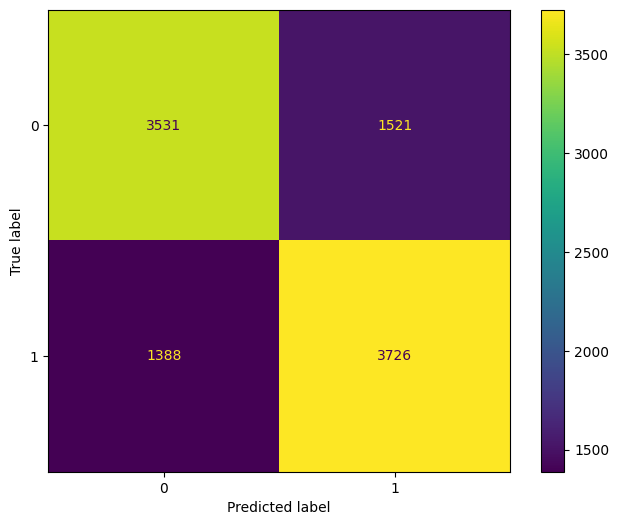

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_2 0.7140643828541918
Training accuracy of LogisticRegression() at iteration number 2 is  0.7140643828541918
Testing accuracy of LogisticRegression() at iteration number 2 is  0.7138500885303954
Cross validation mean accuracy of LogisticRegression() at iteration number 2 is  0.7138051154572416
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [1.4277001770607909, 1.4202401372212694, 2.895647568608207, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [

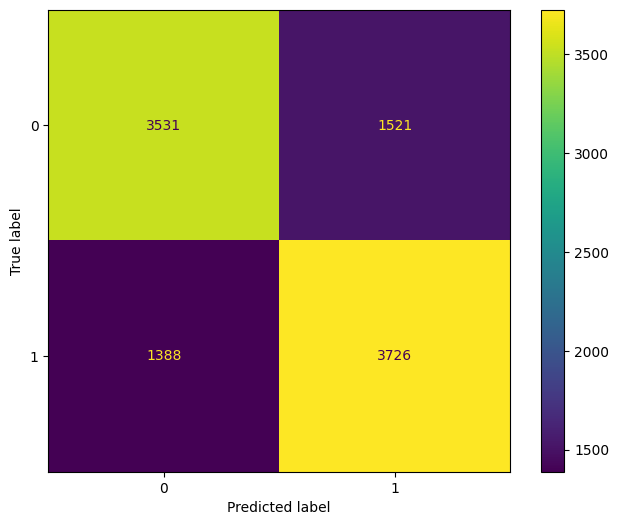

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_3 0.7140643828541918
Training accuracy of LogisticRegression() at iteration number 3 is  0.7140643828541918
Testing accuracy of LogisticRegression() at iteration number 3 is  0.7138500885303954
Cross validation mean accuracy of LogisticRegression() at iteration number 3 is  0.7138051154572416
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [2.1415502655911864, 2.130360205831904, 4.34347135291231, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0,

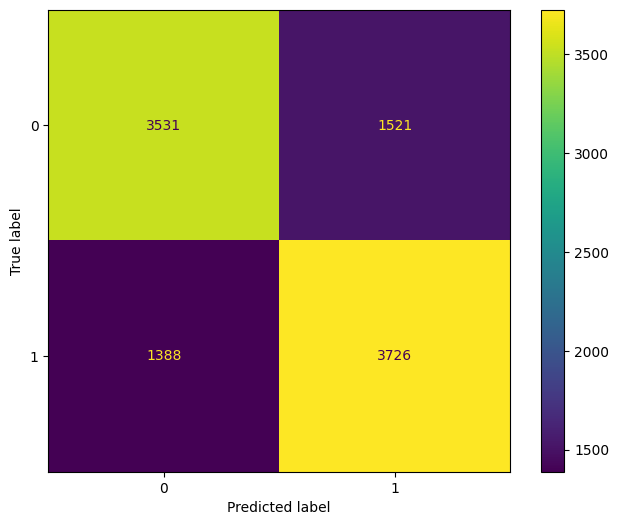

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_4 0.7140643828541918
Training accuracy of LogisticRegression() at iteration number 4 is  0.7140643828541918
Testing accuracy of LogisticRegression() at iteration number 4 is  0.7138500885303954
Cross validation mean accuracy of LogisticRegression() at iteration number 4 is  0.7138051154572416
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [2.8554003541215818, 2.840480274442539, 5.791295137216413, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0

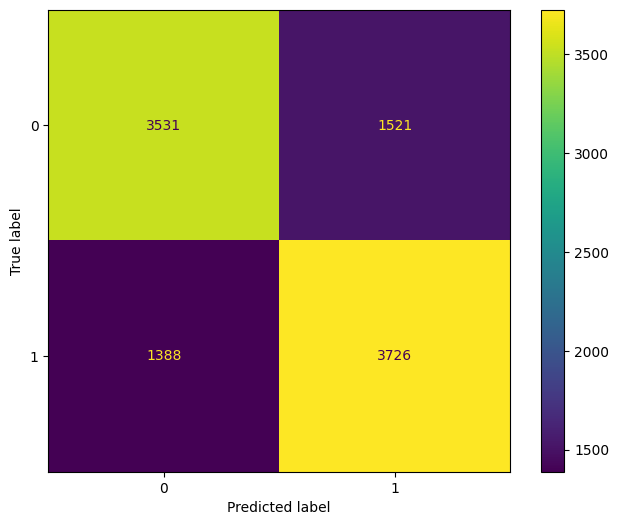

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_5 0.7140643828541918
Training accuracy of LogisticRegression() at iteration number 5 is  0.7140643828541918
Testing accuracy of LogisticRegression() at iteration number 5 is  0.7138500885303954
Cross validation mean accuracy of LogisticRegression() at iteration number 5 is  0.7138051154572416
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [3.569250442651977, 3.5506003430531736, 7.239118921520516, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0

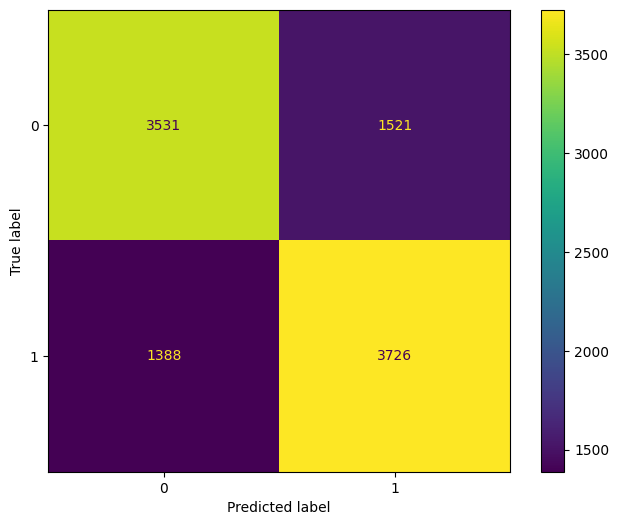

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_6 0.7140643828541918
Training accuracy of LogisticRegression() at iteration number 6 is  0.7140643828541918
Testing accuracy of LogisticRegression() at iteration number 6 is  0.7138500885303954
Cross validation mean accuracy of LogisticRegression() at iteration number 6 is  0.7138051154572416
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [4.283100531182373, 4.260720411663808, 8.68694270582462, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0, 

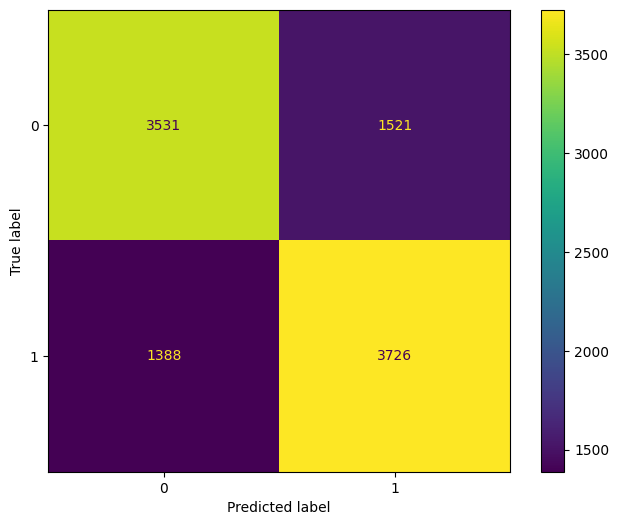

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_7 0.7140643828541918
Training accuracy of LogisticRegression() at iteration number 7 is  0.7140643828541918
Testing accuracy of LogisticRegression() at iteration number 7 is  0.7138500885303954
Cross validation mean accuracy of LogisticRegression() at iteration number 7 is  0.7138051154572416
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [4.996950619712768, 4.970840480274442, 10.134766490128724, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0

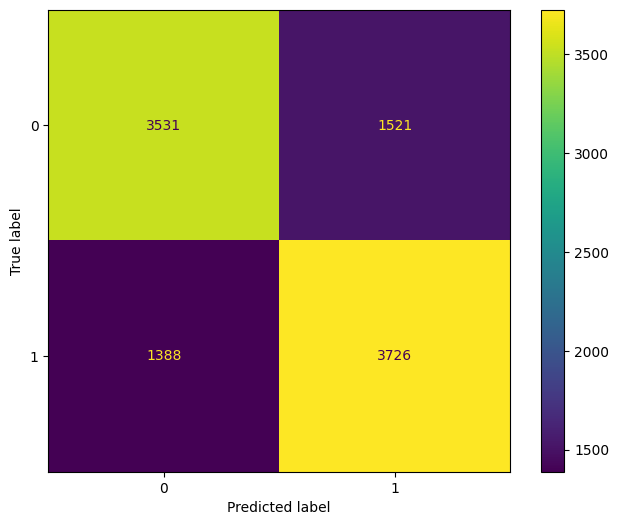

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_8 0.7140643828541918
Training accuracy of LogisticRegression() at iteration number 8 is  0.7140643828541918
Testing accuracy of LogisticRegression() at iteration number 8 is  0.7138500885303954
Cross validation mean accuracy of LogisticRegression() at iteration number 8 is  0.7138051154572416
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [5.7108007082431635, 5.680960548885077, 11.582590274432828, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [

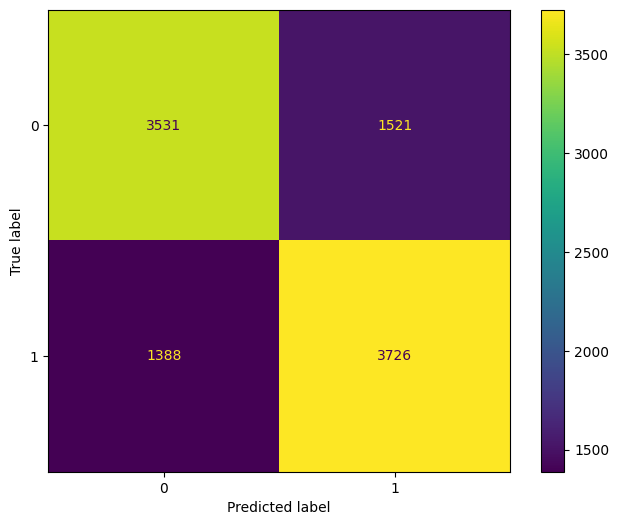

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_9 0.7140643828541918
Training accuracy of LogisticRegression() at iteration number 9 is  0.7140643828541918
Testing accuracy of LogisticRegression() at iteration number 9 is  0.7138500885303954
Cross validation mean accuracy of LogisticRegression() at iteration number 9 is  0.7138051154572416
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [6.424650796773559, 6.391080617495711, 13.030414058736932, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0

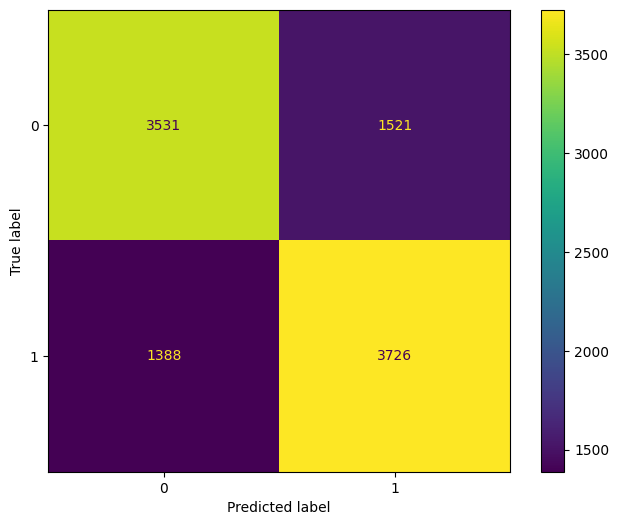

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_10 0.7140643828541918
Training accuracy of LogisticRegression() at iteration number 10 is  0.7140643828541918
Testing accuracy of LogisticRegression() at iteration number 10 is  0.7138500885303954
Cross validation mean accuracy of LogisticRegression() at iteration number 10 is  0.7138051154572416
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [7.138500885303954, 7.1012006861063455, 14.478237843041036, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier(

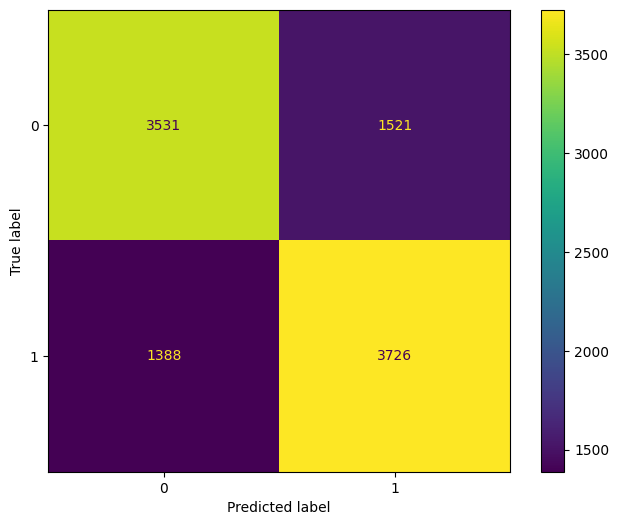


DecisionTreeClassifier_train_accuracy_iteration_1 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 1 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 1 is  0.7527050954160929
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 1 is  0.7531920962973808
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      5052
           1       0.75      0.76      0.76      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166

New_highest is reached at iteration number 1  
 0.7527050954160929 [0.75471698 0.7507716 ] [0.7442597 0.7610481]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.75270509541

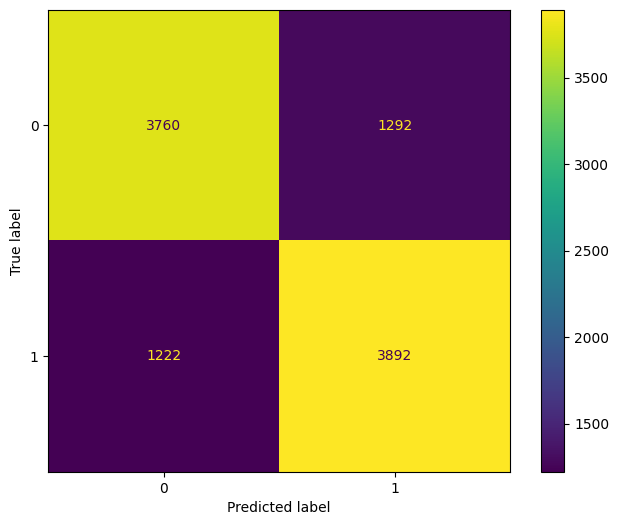


DecisionTreeClassifier_train_accuracy_iteration_2 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 2 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 2 is  0.7529018296281723
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 2 is  0.7538019549361562
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      5052
           1       0.75      0.76      0.76      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166

New_highest is reached at iteration number 2  
 0.7529018296281723 [0.75369557 0.75213178] [0.74683294 0.75889715]

--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [1.505606925

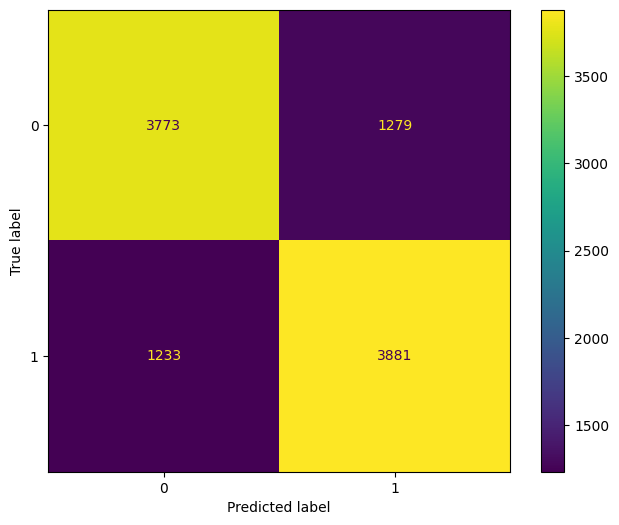


DecisionTreeClassifier_train_accuracy_iteration_3 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 3 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 3 is  0.7563446783395632
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 3 is  0.7529363766590196
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      5052
           1       0.76      0.76      0.76      5114

    accuracy                           0.76     10166
   macro avg       0.76      0.76      0.76     10166
weighted avg       0.76      0.76      0.76     10166

New_highest is reached at iteration number 3  
 0.7563446783395632 [0.75672981 0.75596971] [0.75118765 0.76143919]

--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [2.261951603

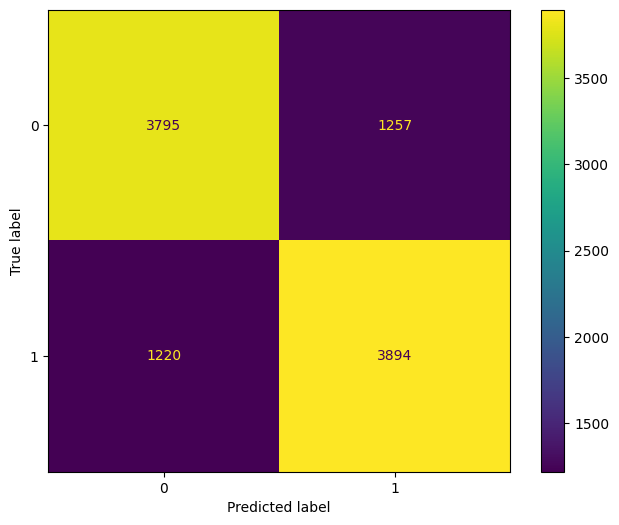


DecisionTreeClassifier_train_accuracy_iteration_4 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 4 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 4 is  0.7506393861892583
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 4 is  0.753664322274832
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      5052
           1       0.75      0.75      0.75      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [3.012590989573087, 3.0102866334052387, 6.057584706473302, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()

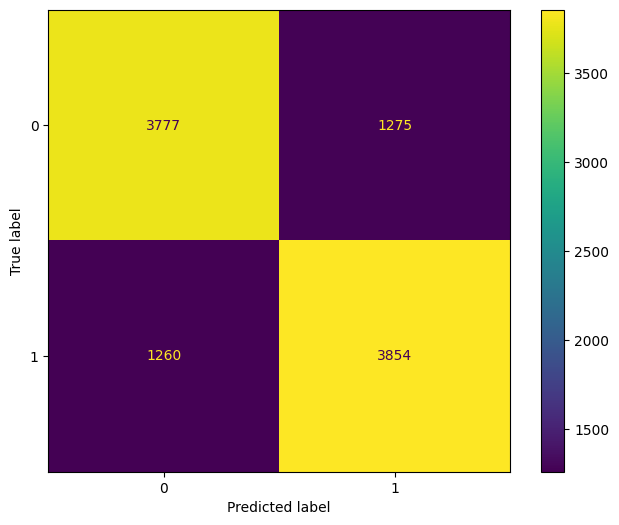


DecisionTreeClassifier_train_accuracy_iteration_5 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 5 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 5 is  0.7505410190832186
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 5 is  0.7539003665565776
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      5052
           1       0.75      0.76      0.75      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [3.7631320086563056, 3.7603836454347306, 7.566567815239708, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier

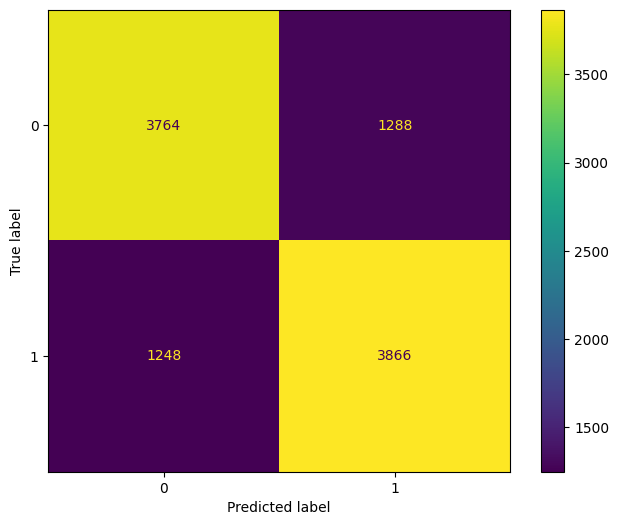


DecisionTreeClassifier_train_accuracy_iteration_6 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 6 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 6 is  0.7518197914617352
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 6 is  0.7531330353901913
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      5052
           1       0.75      0.76      0.75      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [4.514951800118041, 4.511303653182164, 9.07918313429644, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()'

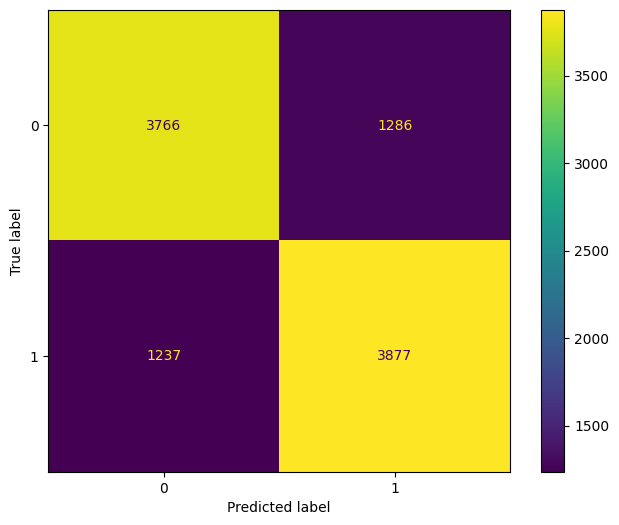


DecisionTreeClassifier_train_accuracy_iteration_7 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 7 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 7 is  0.7499508164469801
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 7 is  0.7538609713289642
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      5052
           1       0.75      0.76      0.75      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [5.2649026165650215, 5.260431898048495, 10.587970177793457, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier

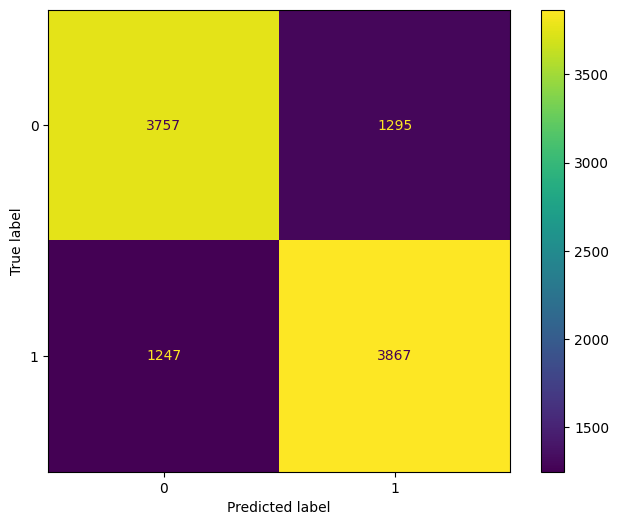


DecisionTreeClassifier_train_accuracy_iteration_8 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 8 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 8 is  0.7524099940979736
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 8 is  0.7546479449500321
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      5052
           1       0.75      0.76      0.76      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [6.017312610662995, 6.011155976055832, 12.103700993481972, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier(

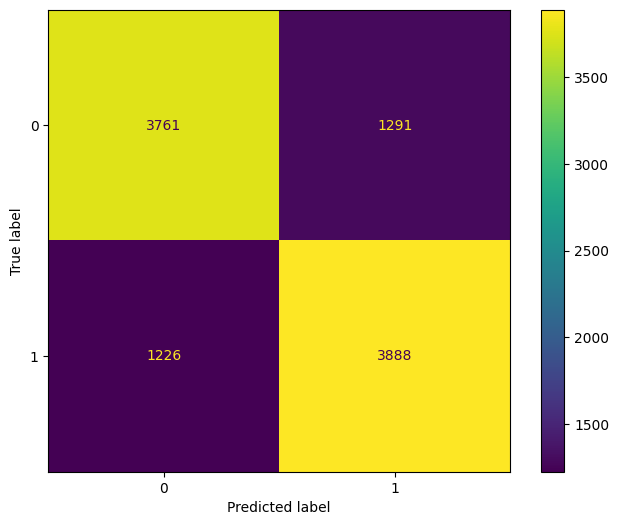


DecisionTreeClassifier_train_accuracy_iteration_9 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 9 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 9 is  0.7503442848711391
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 9 is  0.7538216515822589
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      5052
           1       0.75      0.76      0.75      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [6.7676568955341345, 6.7604784692807645, 13.613755562537088, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifie

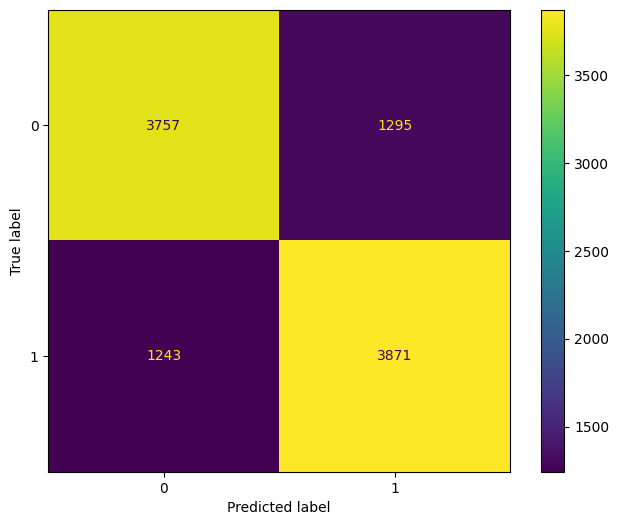


DecisionTreeClassifier_train_accuracy_iteration_10 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 10 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 10 is  0.7513279559315365
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 10 is  0.7539397153344013
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      5052
           1       0.75      0.76      0.75      5114

    accuracy                           0.75     10166
   macro avg       0.75      0.75      0.75     10166
weighted avg       0.75      0.75      0.75     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [7.518984851465671, 7.509323734869679, 15.129409288051233, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassi

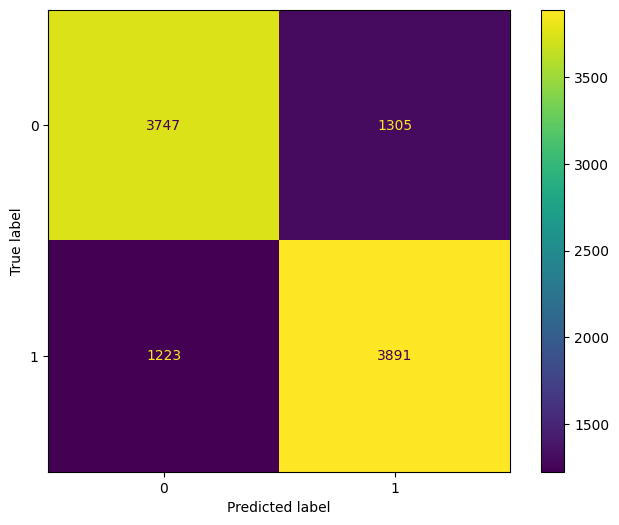

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_1 0.8576101123871824
Training accuracy of KNeighborsClassifier() at iteration number 1 is  0.8576101123871824
Testing accuracy of KNeighborsClassifier() at iteration number 1 is  0.7827070627582137
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 1 is  0.7885065918541198
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      5052
           1       0.76      0.83      0.79      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166

New_highest is reached at iteration number 1  
 0.7827070627582137 [0.81084627 0.75969962] [0.73396675 0.83085647]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClass

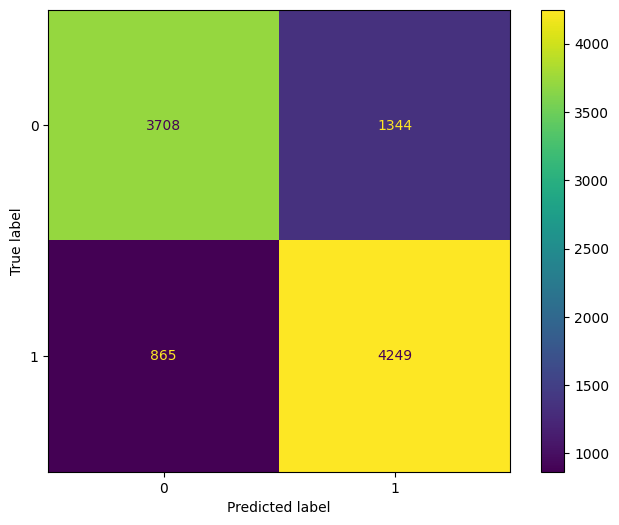

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_2 0.8576101123871824
Training accuracy of KNeighborsClassifier() at iteration number 2 is  0.8576101123871824
Testing accuracy of KNeighborsClassifier() at iteration number 2 is  0.7827070627582137
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 2 is  0.7885065918541198
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      5052
           1       0.76      0.83      0.79      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [1.5654141255

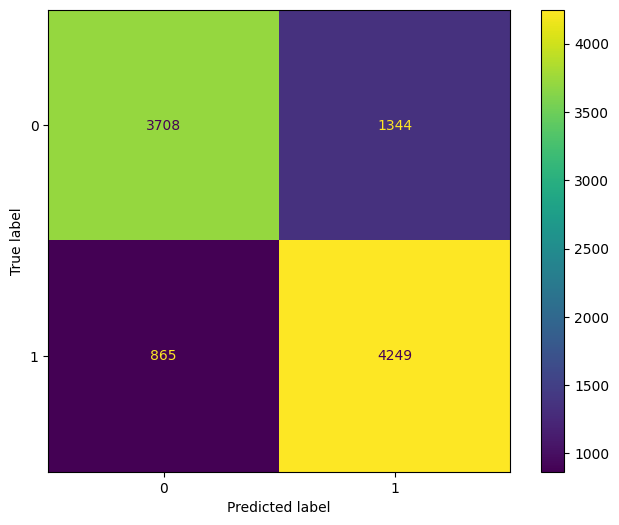

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_3 0.8576101123871824
Training accuracy of KNeighborsClassifier() at iteration number 3 is  0.8576101123871824
Testing accuracy of KNeighborsClassifier() at iteration number 3 is  0.7827070627582137
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 3 is  0.7885065918541198
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      5052
           1       0.76      0.83      0.79      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [2.3481211882

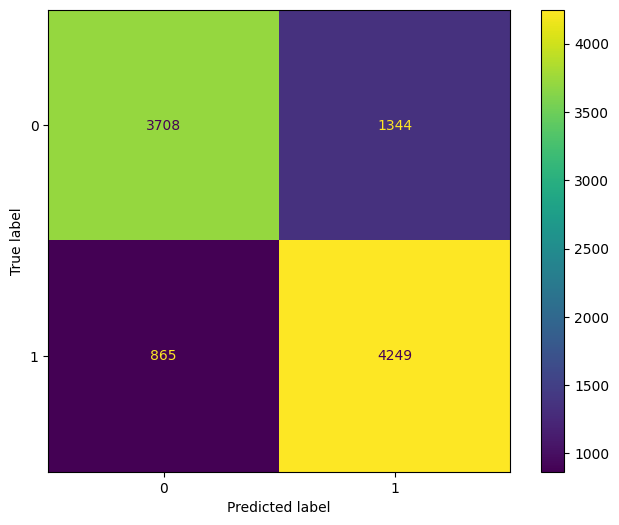

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_4 0.8576101123871824
Training accuracy of KNeighborsClassifier() at iteration number 4 is  0.8576101123871824
Testing accuracy of KNeighborsClassifier() at iteration number 4 is  0.7827070627582137
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 4 is  0.7885065918541198
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      5052
           1       0.76      0.83      0.79      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [3.1308282510

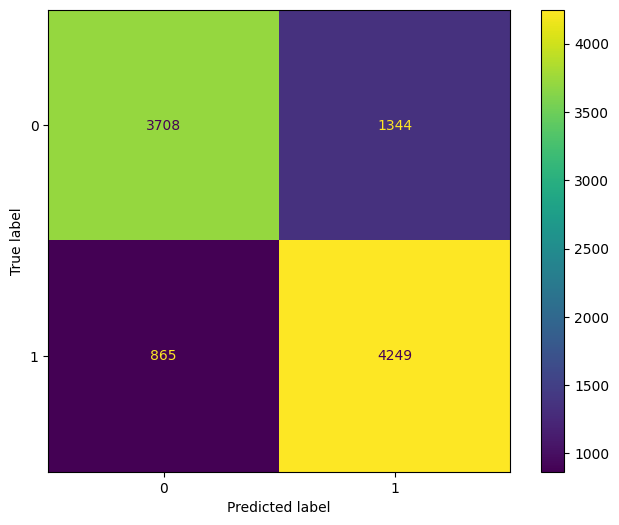

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_5 0.8576101123871824
Training accuracy of KNeighborsClassifier() at iteration number 5 is  0.8576101123871824
Testing accuracy of KNeighborsClassifier() at iteration number 5 is  0.7827070627582137
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 5 is  0.7885065918541198
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      5052
           1       0.76      0.83      0.79      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [3.9135353137

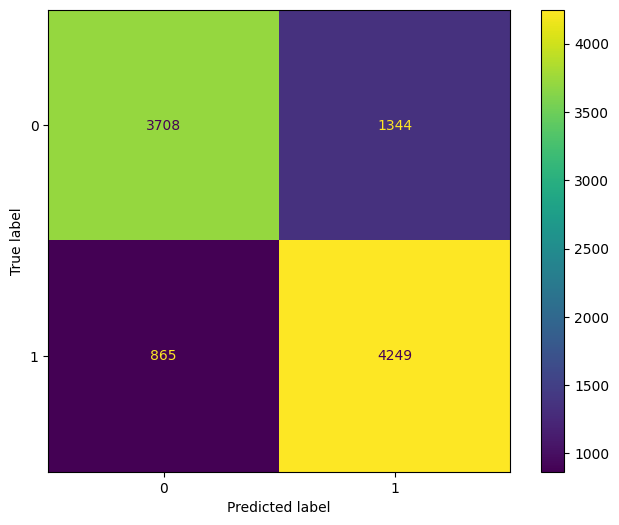

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_6 0.8576101123871824
Training accuracy of KNeighborsClassifier() at iteration number 6 is  0.8576101123871824
Testing accuracy of KNeighborsClassifier() at iteration number 6 is  0.7827070627582137
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 6 is  0.7885065918541198
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      5052
           1       0.76      0.83      0.79      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [4.6962423765

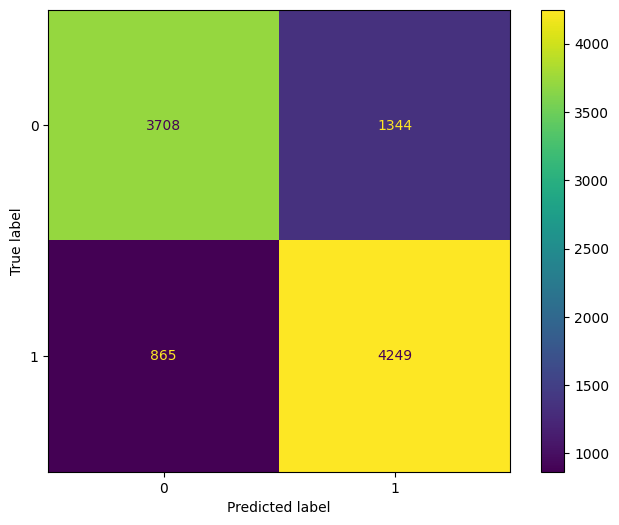

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_7 0.8576101123871824
Training accuracy of KNeighborsClassifier() at iteration number 7 is  0.8576101123871824
Testing accuracy of KNeighborsClassifier() at iteration number 7 is  0.7827070627582137
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 7 is  0.7885065918541198
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      5052
           1       0.76      0.83      0.79      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [5.4789494393

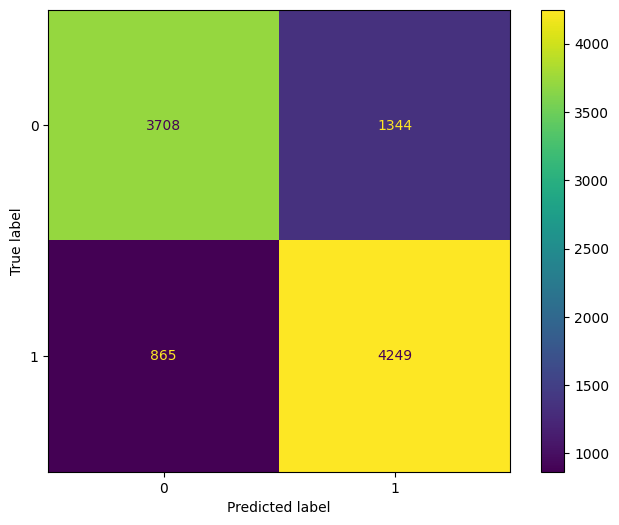

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_8 0.8576101123871824
Training accuracy of KNeighborsClassifier() at iteration number 8 is  0.8576101123871824
Testing accuracy of KNeighborsClassifier() at iteration number 8 is  0.7827070627582137
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 8 is  0.7885065918541198
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      5052
           1       0.76      0.83      0.79      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [6.2616565020

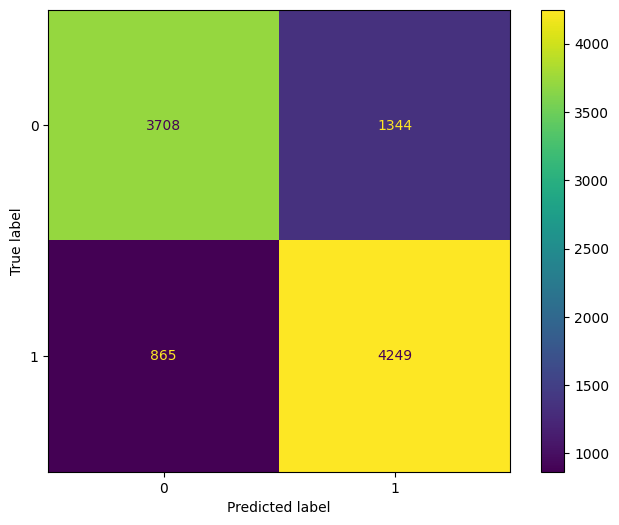

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_9 0.8576101123871824
Training accuracy of KNeighborsClassifier() at iteration number 9 is  0.8576101123871824
Testing accuracy of KNeighborsClassifier() at iteration number 9 is  0.7827070627582137
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 9 is  0.7885065918541198
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      5052
           1       0.76      0.83      0.79      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [7.0443635648

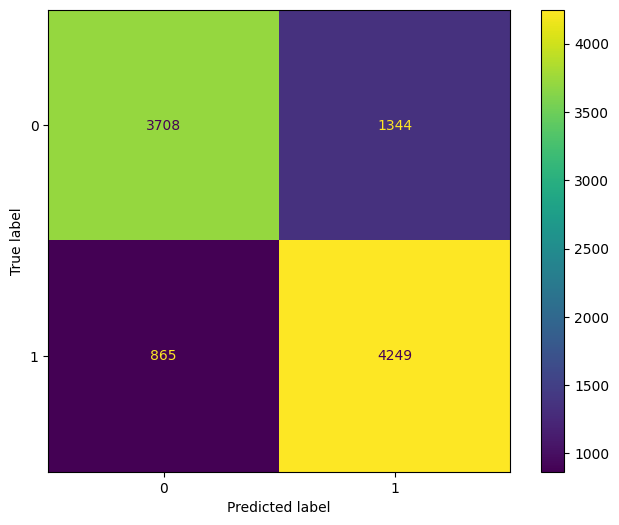

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_10 0.8576101123871824
Training accuracy of KNeighborsClassifier() at iteration number 10 is  0.8576101123871824
Testing accuracy of KNeighborsClassifier() at iteration number 10 is  0.7827070627582137
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 10 is  0.7885065918541198
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      5052
           1       0.76      0.83      0.79      5114

    accuracy                           0.78     10166
   macro avg       0.79      0.78      0.78     10166
weighted avg       0.79      0.78      0.78     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [7.82707

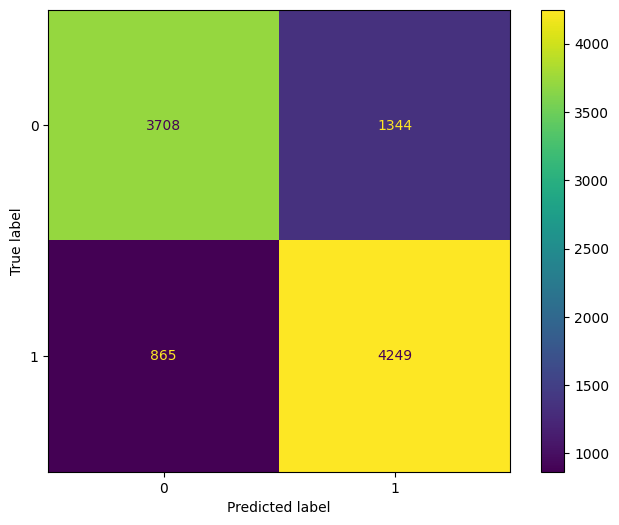

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_1 1.0
Training accuracy of RandomForestClassifier() at iteration number 1 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 1 is  0.8017902813299232
Cross validation mean accuracy of RandomForestClassifier() at iteration number 1 is  0.8089083999508795
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      5052
           1       0.78      0.84      0.81      5114

    accuracy                           0.80     10166
   macro avg       0.80      0.80      0.80     10166
weighted avg       0.80      0.80      0.80     10166

New_highest is reached at iteration number 1  
 0.8017902813299232 [0.82192071 0.7843641 ] [0.76741884 0.83574501]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.751898485

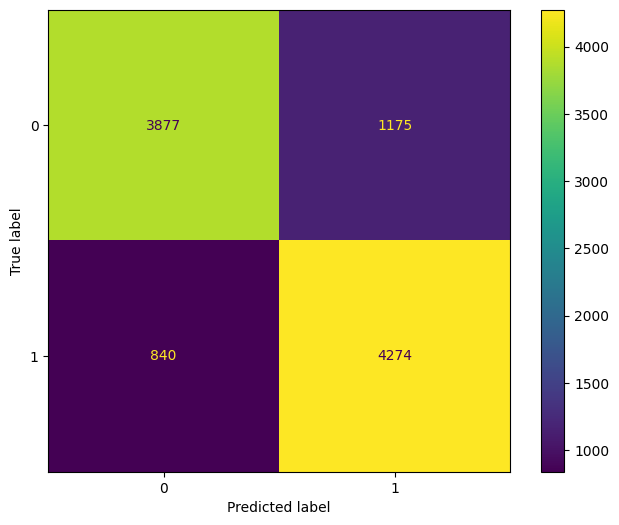

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_2 1.0
Training accuracy of RandomForestClassifier() at iteration number 2 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 2 is  0.804544560299036
Cross validation mean accuracy of RandomForestClassifier() at iteration number 2 is  0.8079049877299977
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      5052
           1       0.79      0.84      0.81      5114

    accuracy                           0.80     10166
   macro avg       0.81      0.80      0.80     10166
weighted avg       0.81      0.80      0.80     10166

New_highest is reached at iteration number 2  
 0.804544560299036 [0.82461343 0.78714417] [0.77058591 0.83809151]

--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.75189848514

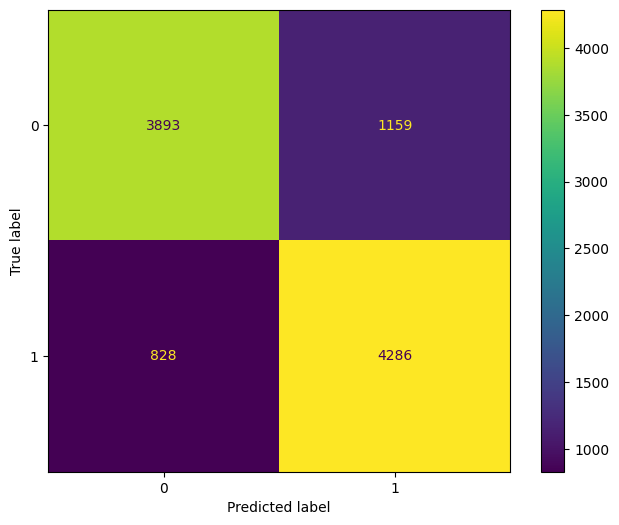

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_3 1.0
Training accuracy of RandomForestClassifier() at iteration number 3 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 3 is  0.8054298642533937
Cross validation mean accuracy of RandomForestClassifier() at iteration number 3 is  0.807846002303716
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      5052
           1       0.79      0.84      0.81      5114

    accuracy                           0.81     10166
   macro avg       0.81      0.81      0.81     10166
weighted avg       0.81      0.81      0.81     10166

New_highest is reached at iteration number 3  
 0.8054298642533937 [0.8250846 0.7883413] [0.77216944 0.83828706]

--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.751898485146

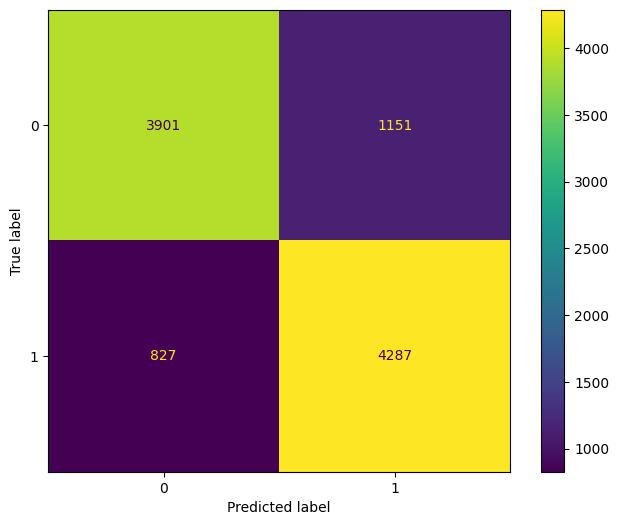

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_4 1.0
Training accuracy of RandomForestClassifier() at iteration number 4 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 4 is  0.8066102695258706
Cross validation mean accuracy of RandomForestClassifier() at iteration number 4 is  0.8083771691930675
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      5052
           1       0.79      0.84      0.81      5114

    accuracy                           0.81     10166
   macro avg       0.81      0.81      0.81     10166
weighted avg       0.81      0.81      0.81     10166

New_highest is reached at iteration number 4  
 0.8066102695258706 [0.82470539 0.79072774] [0.77573238 0.83711381]

--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.751898485

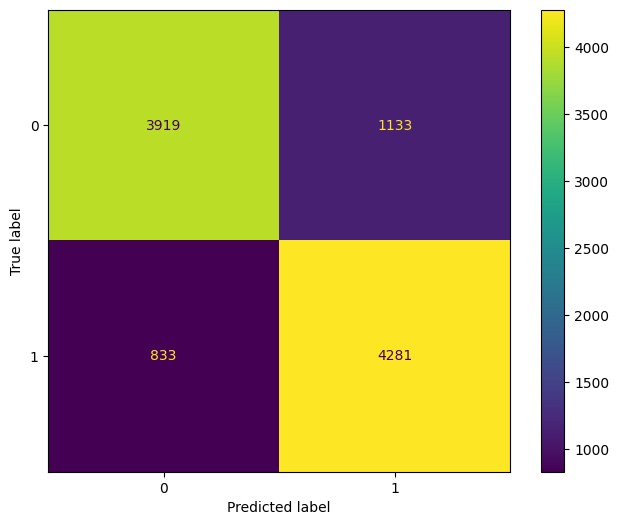

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_5 0.9999754076187197
Training accuracy of RandomForestClassifier() at iteration number 5 is  0.9999754076187197
Testing accuracy of RandomForestClassifier() at iteration number 5 is  0.8064135353137911
Cross validation mean accuracy of RandomForestClassifier() at iteration number 5 is  0.8085542803045442
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      5052
           1       0.79      0.84      0.81      5114

    accuracy                           0.81     10166
   macro avg       0.81      0.81      0.81     10166
weighted avg       0.81      0.81      0.81     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.78

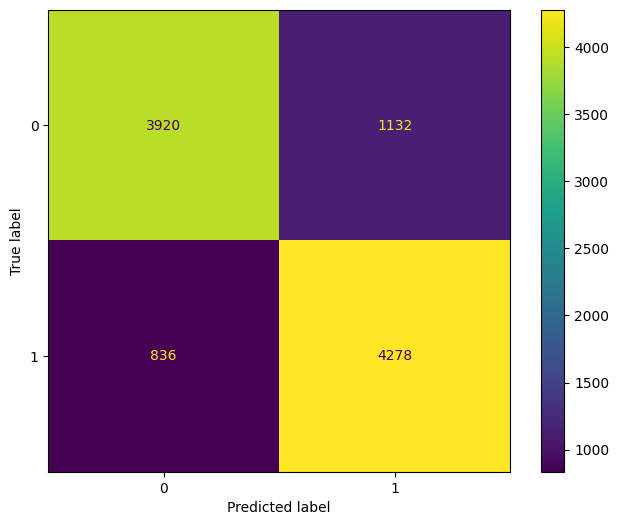

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_6 1.0
Training accuracy of RandomForestClassifier() at iteration number 6 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 6 is  0.8040527247688373
Cross validation mean accuracy of RandomForestClassifier() at iteration number 6 is  0.8087903381341448
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      5052
           1       0.79      0.84      0.81      5114

    accuracy                           0.80     10166
   macro avg       0.81      0.80      0.80     10166
weighted avg       0.81      0.80      0.80     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.759699624530

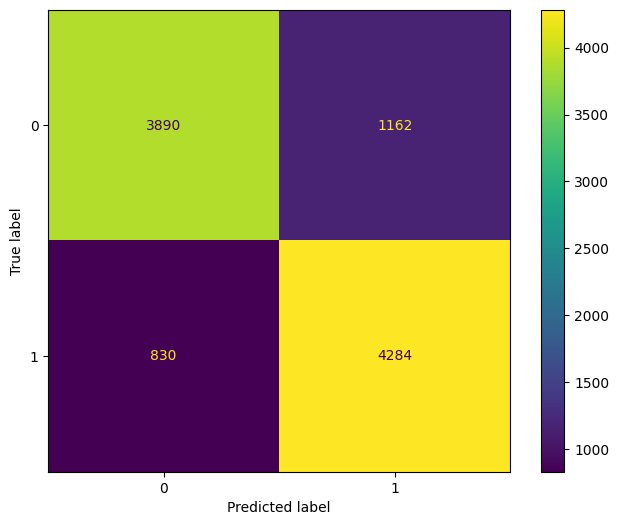

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_7 1.0
Training accuracy of RandomForestClassifier() at iteration number 7 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 7 is  0.8042494589809168
Cross validation mean accuracy of RandomForestClassifier() at iteration number 7 is  0.8085739788860546
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      5052
           1       0.79      0.84      0.81      5114

    accuracy                           0.80     10166
   macro avg       0.81      0.80      0.80     10166
weighted avg       0.81      0.80      0.80     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.759699624530

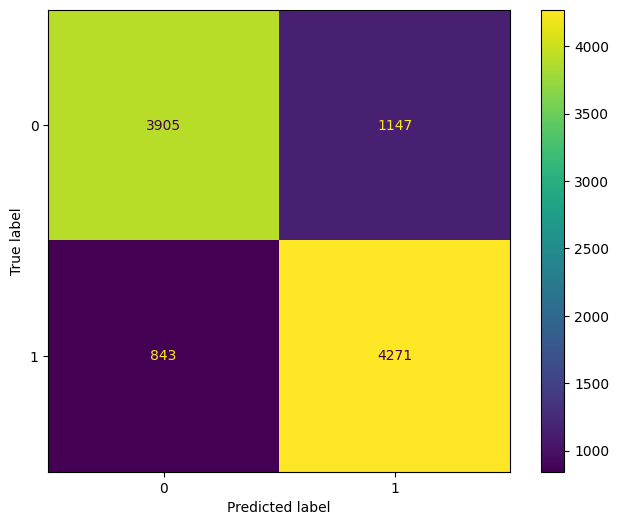

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_8 1.0
Training accuracy of RandomForestClassifier() at iteration number 8 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 8 is  0.8046429274050757
Cross validation mean accuracy of RandomForestClassifier() at iteration number 8 is  0.8071967735976301
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      5052
           1       0.79      0.84      0.81      5114

    accuracy                           0.80     10166
   macro avg       0.81      0.80      0.80     10166
weighted avg       0.81      0.80      0.80     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.759699624530

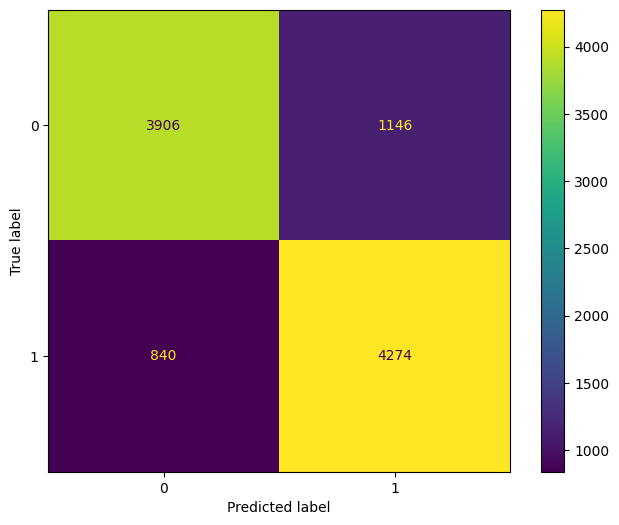

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_9 1.0
Training accuracy of RandomForestClassifier() at iteration number 9 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 9 is  0.805331497147354
Cross validation mean accuracy of RandomForestClassifier() at iteration number 9 is  0.8086723266380155
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      5052
           1       0.79      0.84      0.81      5114

    accuracy                           0.81     10166
   macro avg       0.81      0.81      0.81     10166
weighted avg       0.81      0.81      0.81     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306

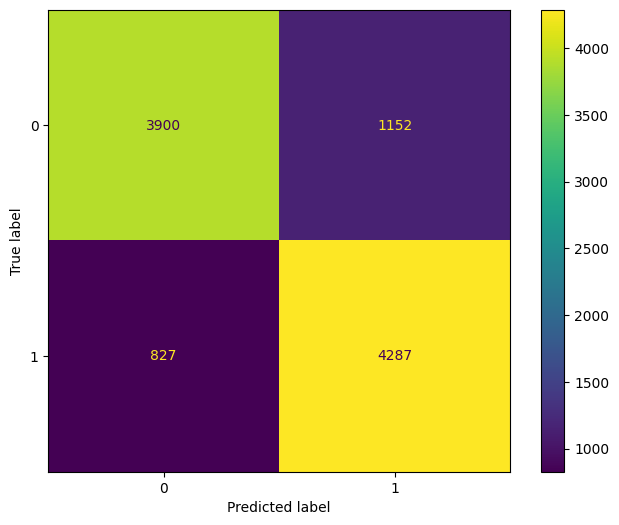

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_10 1.0
Training accuracy of RandomForestClassifier() at iteration number 10 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 10 is  0.8034625221325988
Cross validation mean accuracy of RandomForestClassifier() at iteration number 10 is  0.8087903516820001
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      5052
           1       0.79      0.84      0.81      5114

    accuracy                           0.80     10166
   macro avg       0.80      0.80      0.80     10166
weighted avg       0.80      0.80      0.80     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996

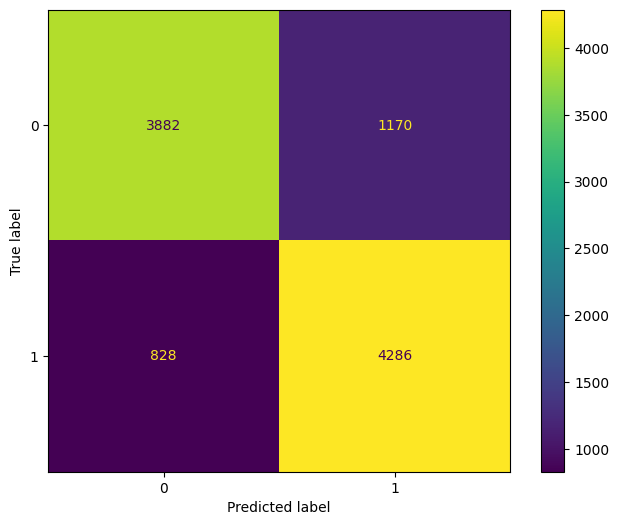

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_1 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 1 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 1 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 1 is  0.6987546850176882
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166

New_highest is reached at iteration number 1  
 0.6982097186700768 [0.71985816 0.68093385] [0.6429137  0.75283535]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.751898485146567

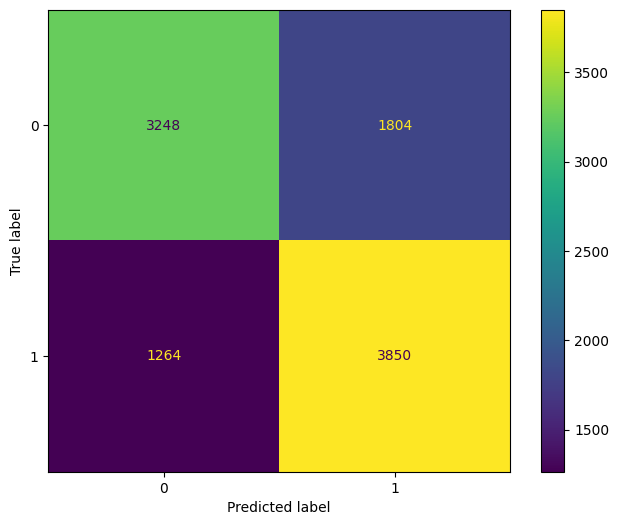

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_2 0.704571723680004
Training accuracy of SGDClassifier() at iteration number 2 is  0.704571723680004
Testing accuracy of SGDClassifier() at iteration number 2 is  0.703029706866024
Cross validation mean accuracy of SGDClassifier() at iteration number 2 is  0.6985776068081456
              precision    recall  f1-score   support

           0       0.73      0.65      0.68      5052
           1       0.69      0.76      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.71      0.70      0.70     10166
weighted avg       0.71      0.70      0.70     10166

New_highest is reached at iteration number 2  
 0.703029706866024 [0.72563818 0.68503798] [0.64707047 0.75831052]

--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0

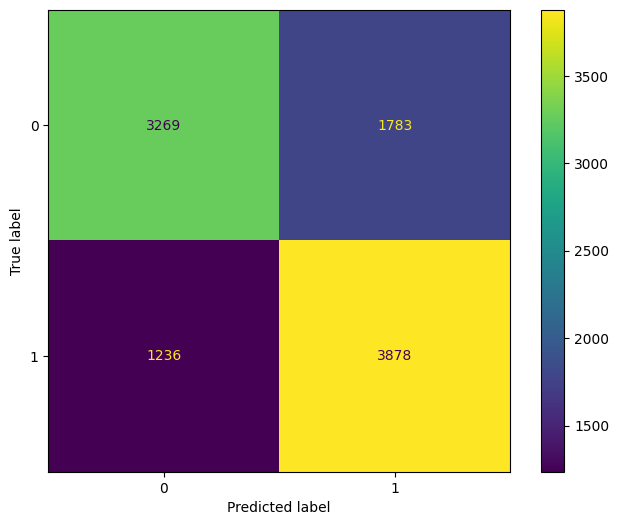

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_3 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 3 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 3 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 3 is  0.6985776068081456
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 

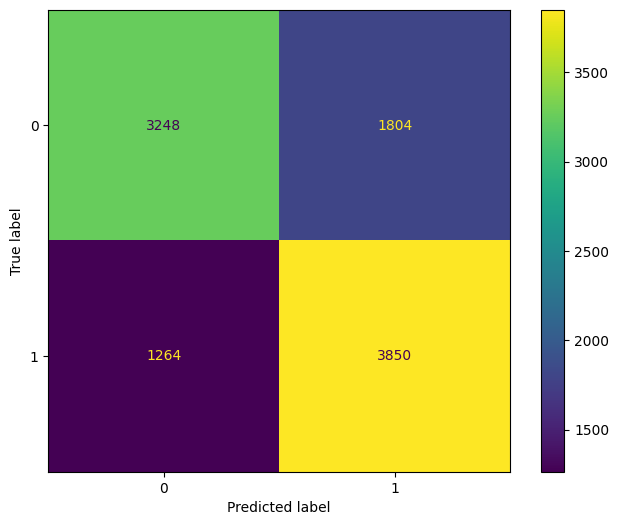

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_4 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 4 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 4 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 4 is  0.6985972802293536
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 

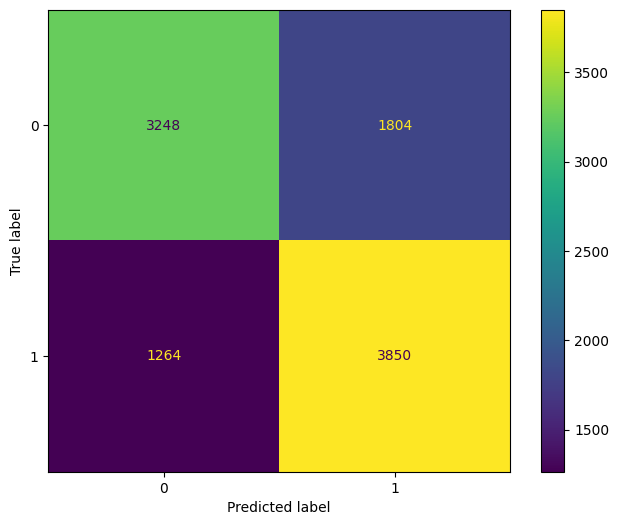

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_5 0.7030469960406266
Training accuracy of SGDClassifier() at iteration number 5 is  0.7030469960406266
Testing accuracy of SGDClassifier() at iteration number 5 is  0.7012590989573086
Cross validation mean accuracy of SGDClassifier() at iteration number 5 is  0.698853034705057
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.76      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 1

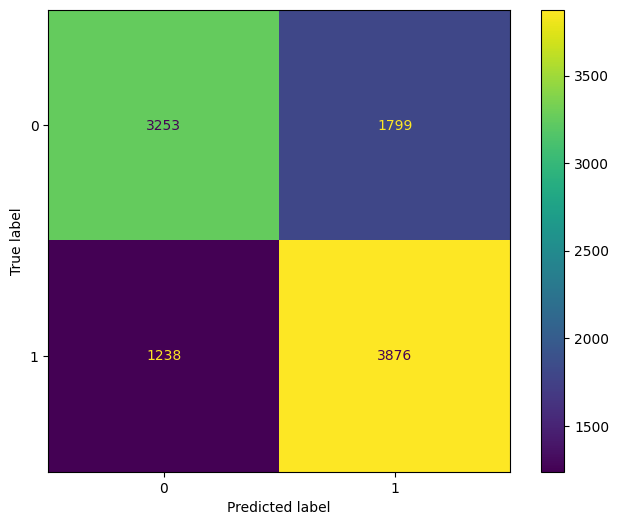

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_6 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 6 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 6 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 6 is  0.6987153343044565
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 

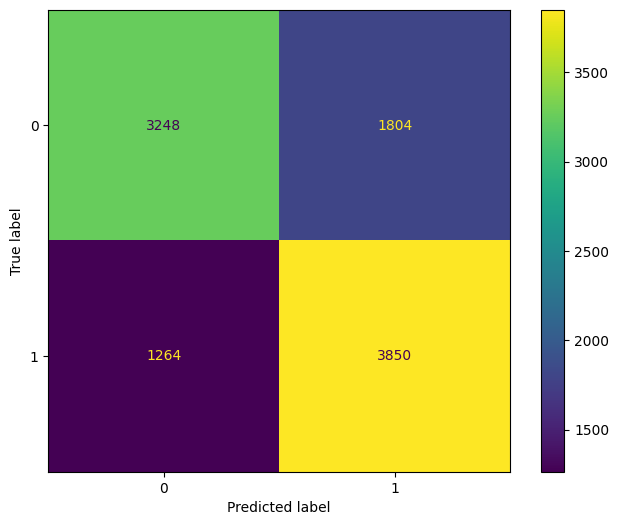

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_7 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 7 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 7 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 7 is  0.6986563004929774
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 

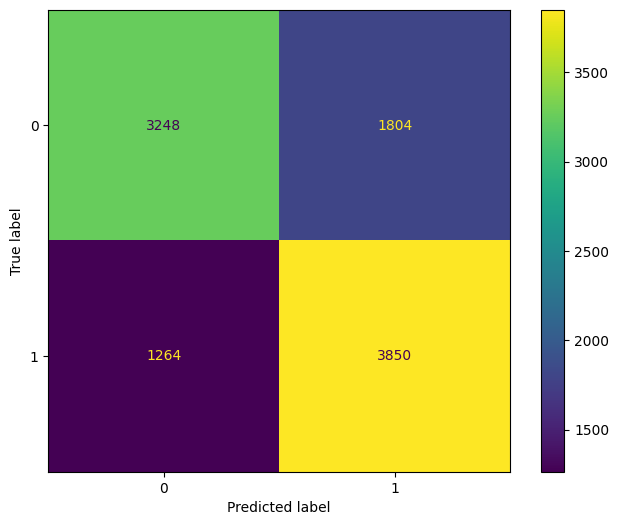

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_8 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 8 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 8 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 8 is  0.6988923815474728
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 

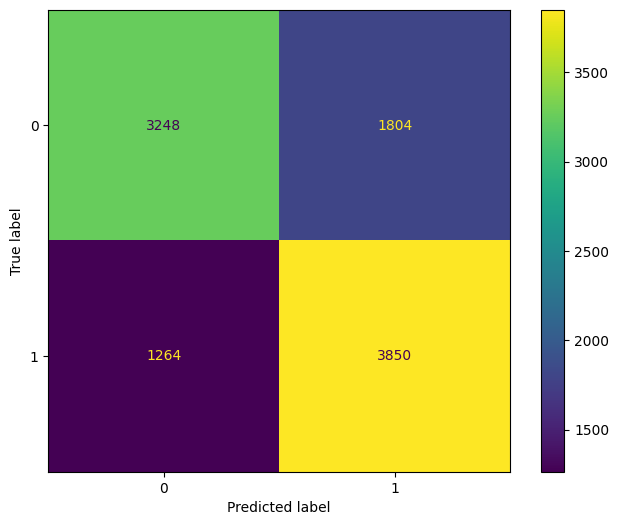

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_9 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 9 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 9 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 9 is  0.6985972802293536
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 

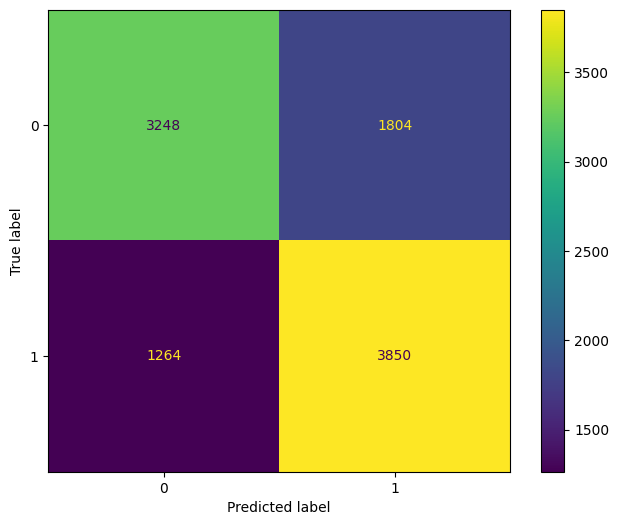

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_10 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 10 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 10 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 10 is  0.6985579314515298
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306

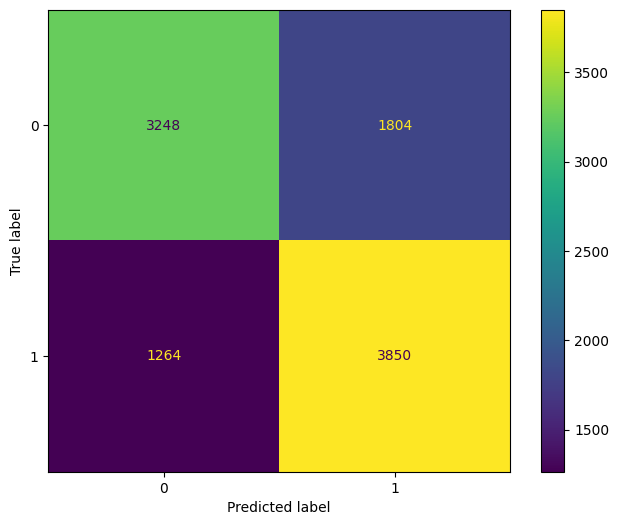

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_1 0.7152202247743649
Training accuracy of RidgeClassifierCV() at iteration number 1 is  0.7152202247743649
Testing accuracy of RidgeClassifierCV() at iteration number 1 is  0.7140468227424749
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 1 is  0.7147297894789097
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.74      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166

New_highest is reached at iteration number 1  
 0.7140468227424749 [0.72127089 0.70746381] [0.69200317 0.73582323]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0

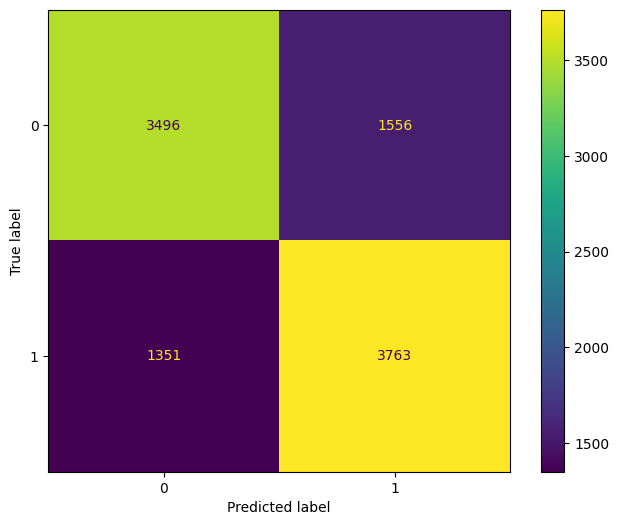

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_2 0.7152202247743649
Training accuracy of RidgeClassifierCV() at iteration number 2 is  0.7152202247743649
Testing accuracy of RidgeClassifierCV() at iteration number 2 is  0.7140468227424749
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 2 is  0.7147297894789097
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.74      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.75

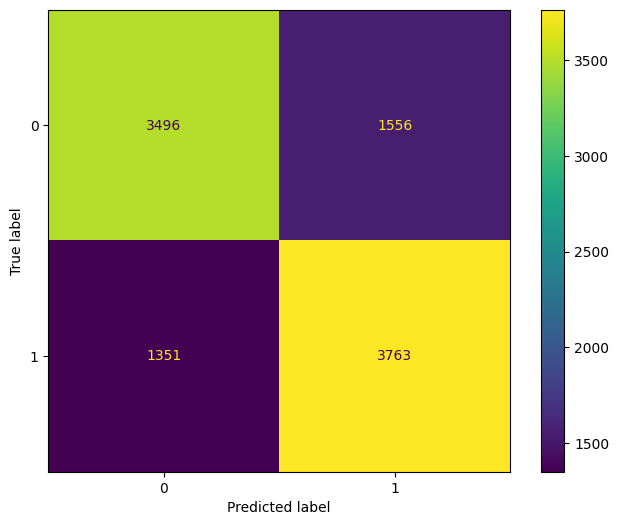

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_3 0.7152202247743649
Training accuracy of RidgeClassifierCV() at iteration number 3 is  0.7152202247743649
Testing accuracy of RidgeClassifierCV() at iteration number 3 is  0.7140468227424749
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 3 is  0.7147297894789097
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.74      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.75

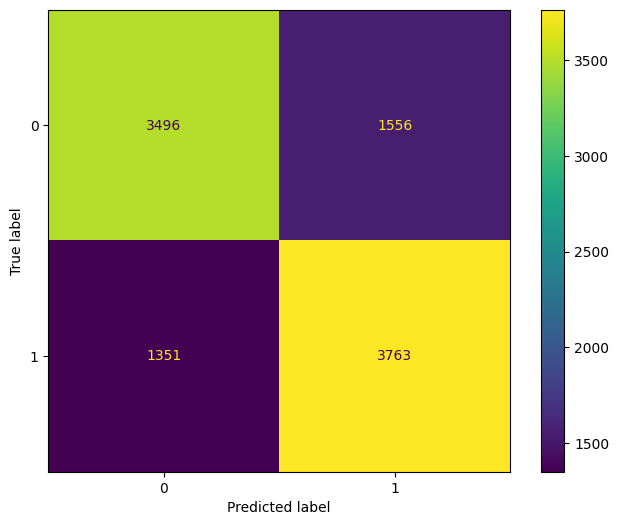

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_4 0.7152202247743649
Training accuracy of RidgeClassifierCV() at iteration number 4 is  0.7152202247743649
Testing accuracy of RidgeClassifierCV() at iteration number 4 is  0.7140468227424749
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 4 is  0.7147297894789097
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.74      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.75

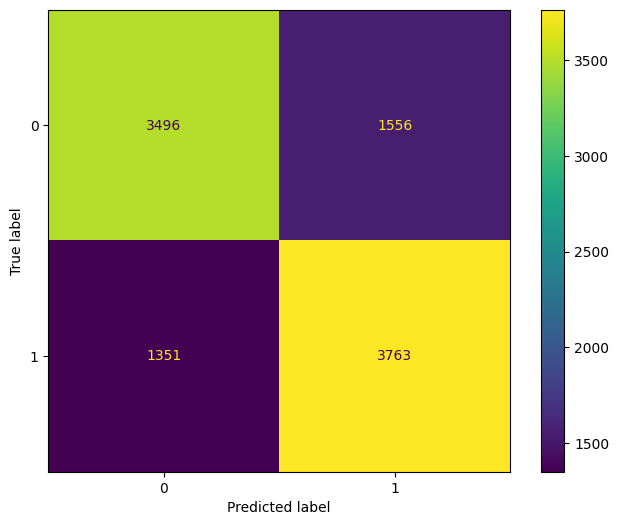

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_5 0.7152202247743649
Training accuracy of RidgeClassifierCV() at iteration number 5 is  0.7152202247743649
Testing accuracy of RidgeClassifierCV() at iteration number 5 is  0.7140468227424749
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 5 is  0.7147297894789097
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.74      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.75

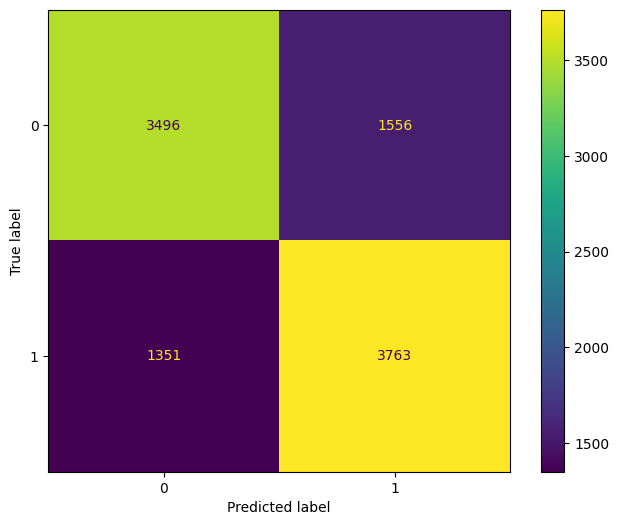

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_6 0.7152202247743649
Training accuracy of RidgeClassifierCV() at iteration number 6 is  0.7152202247743649
Testing accuracy of RidgeClassifierCV() at iteration number 6 is  0.7140468227424749
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 6 is  0.7147297894789097
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.74      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.75

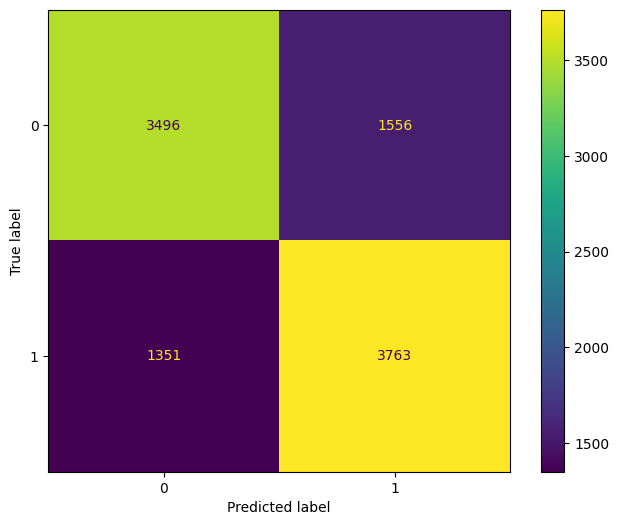

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_7 0.7152202247743649
Training accuracy of RidgeClassifierCV() at iteration number 7 is  0.7152202247743649
Testing accuracy of RidgeClassifierCV() at iteration number 7 is  0.7140468227424749
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 7 is  0.7147297894789097
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.74      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.75

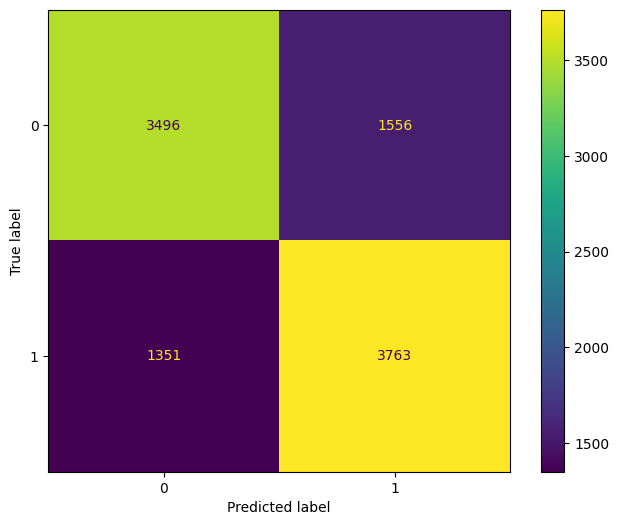

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_8 0.7152202247743649
Training accuracy of RidgeClassifierCV() at iteration number 8 is  0.7152202247743649
Testing accuracy of RidgeClassifierCV() at iteration number 8 is  0.7140468227424749
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 8 is  0.7147297894789097
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.74      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.75

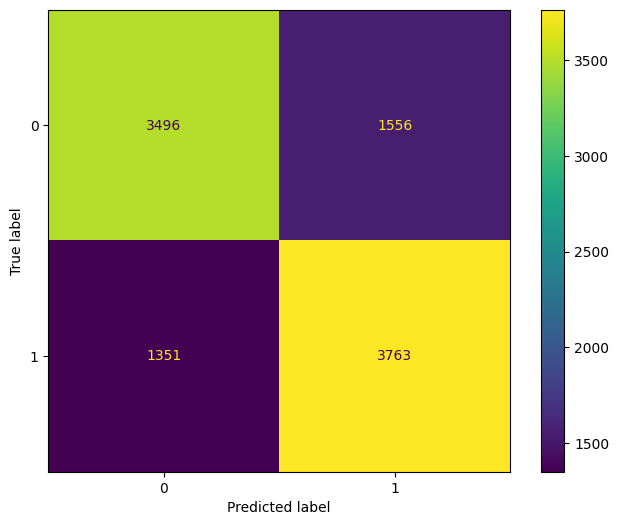

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_9 0.7152202247743649
Training accuracy of RidgeClassifierCV() at iteration number 9 is  0.7152202247743649
Testing accuracy of RidgeClassifierCV() at iteration number 9 is  0.7140468227424749
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 9 is  0.7147297894789097
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.74      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.75

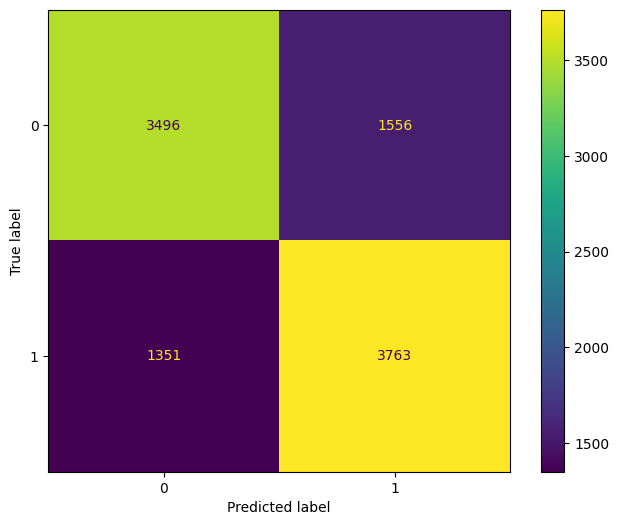

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_10 0.7152202247743649
Training accuracy of RidgeClassifierCV() at iteration number 10 is  0.7152202247743649
Testing accuracy of RidgeClassifierCV() at iteration number 10 is  0.7140468227424749
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 10 is  0.7147297894789097
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.74      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138,

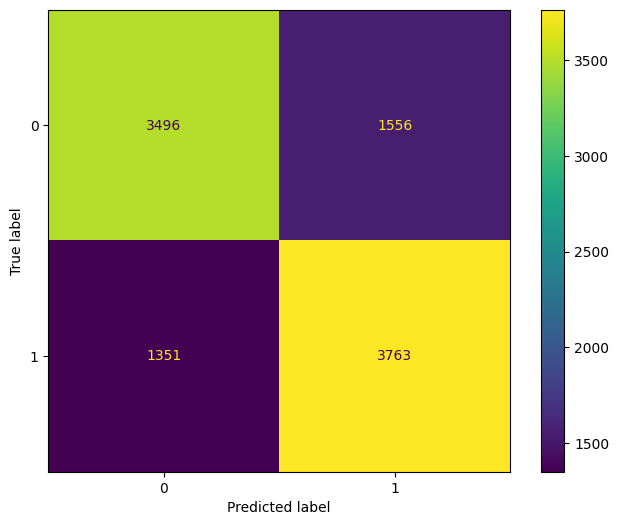

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_1 0.7158842190689324
Training accuracy of GaussianNB() at iteration number 1 is  0.7158842190689324
Testing accuracy of GaussianNB() at iteration number 1 is  0.7157190635451505
Cross validation mean accuracy of GaussianNB() at iteration number 1 is  0.7159299030099366
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      5052
           1       0.69      0.79      0.74      5114

    accuracy                           0.72     10166
   macro avg       0.72      0.72      0.71     10166
weighted avg       0.72      0.72      0.71     10166

New_highest is reached at iteration number 1  
 0.7157190635451505 [0.74816345 0.69139415] [0.64509105 0.78549081]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.7509323

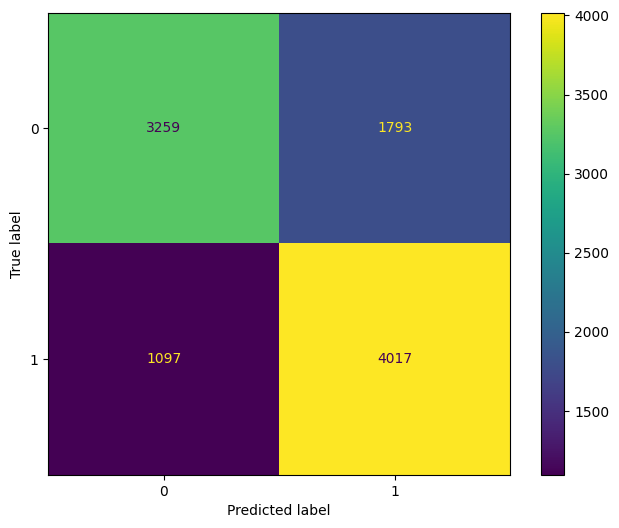

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_2 0.7158842190689324
Training accuracy of GaussianNB() at iteration number 2 is  0.7158842190689324
Testing accuracy of GaussianNB() at iteration number 2 is  0.7157190635451505
Cross validation mean accuracy of GaussianNB() at iteration number 2 is  0.7159299030099366
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      5052
           1       0.69      0.79      0.74      5114

    accuracy                           0.72     10166
   macro avg       0.72      0.72      0.71     10166
weighted avg       0.72      0.72      0.71     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 1.6245428458

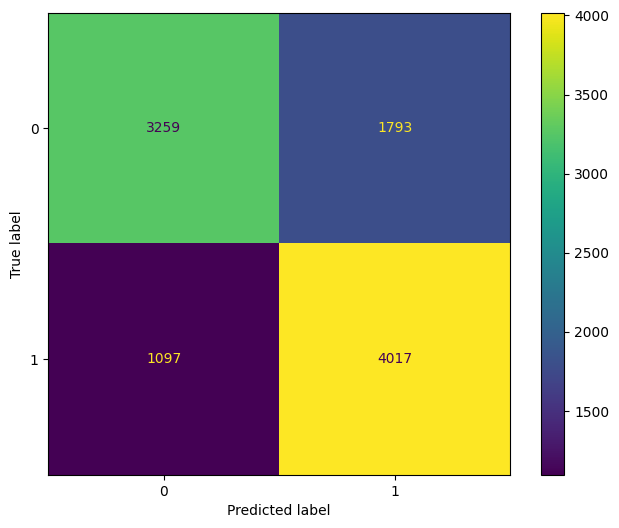

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_3 0.7158842190689324
Training accuracy of GaussianNB() at iteration number 3 is  0.7158842190689324
Testing accuracy of GaussianNB() at iteration number 3 is  0.7157190635451505
Cross validation mean accuracy of GaussianNB() at iteration number 3 is  0.7159299030099366
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      5052
           1       0.69      0.79      0.74      5114

    accuracy                           0.72     10166
   macro avg       0.72      0.72      0.71     10166
weighted avg       0.72      0.72      0.71     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 1.6245428458

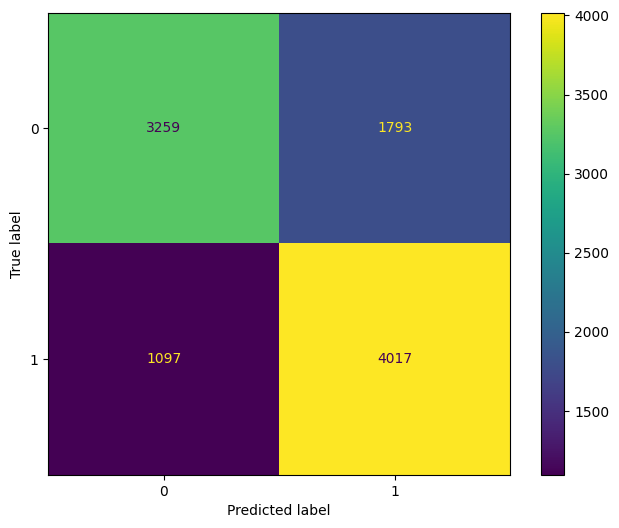

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_4 0.7158842190689324
Training accuracy of GaussianNB() at iteration number 4 is  0.7158842190689324
Testing accuracy of GaussianNB() at iteration number 4 is  0.7157190635451505
Cross validation mean accuracy of GaussianNB() at iteration number 4 is  0.7159299030099366
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      5052
           1       0.69      0.79      0.74      5114

    accuracy                           0.72     10166
   macro avg       0.72      0.72      0.71     10166
weighted avg       0.72      0.72      0.71     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 1.6245428458

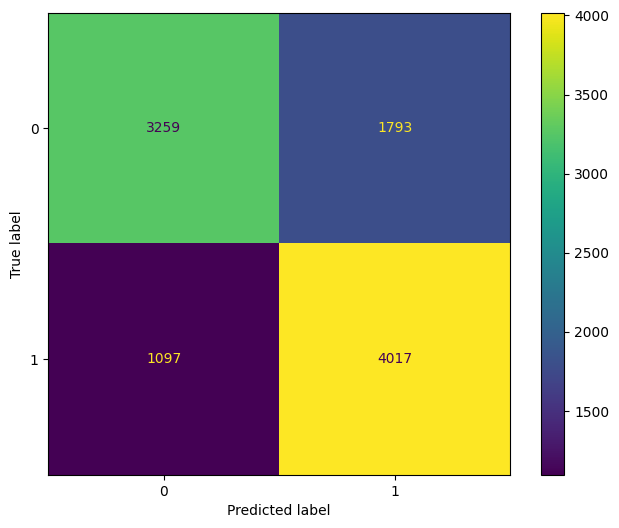

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_5 0.7158842190689324
Training accuracy of GaussianNB() at iteration number 5 is  0.7158842190689324
Testing accuracy of GaussianNB() at iteration number 5 is  0.7157190635451505
Cross validation mean accuracy of GaussianNB() at iteration number 5 is  0.7159299030099366
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      5052
           1       0.69      0.79      0.74      5114

    accuracy                           0.72     10166
   macro avg       0.72      0.72      0.71     10166
weighted avg       0.72      0.72      0.71     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 1.6245428458

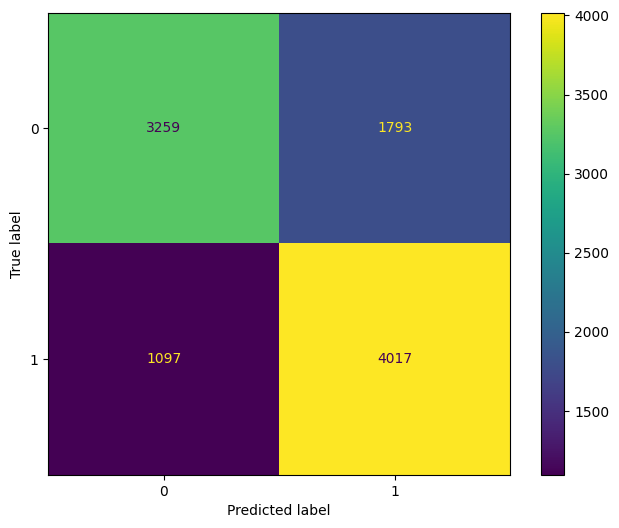

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_6 0.7158842190689324
Training accuracy of GaussianNB() at iteration number 6 is  0.7158842190689324
Testing accuracy of GaussianNB() at iteration number 6 is  0.7157190635451505
Cross validation mean accuracy of GaussianNB() at iteration number 6 is  0.7159299030099366
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      5052
           1       0.69      0.79      0.74      5114

    accuracy                           0.72     10166
   macro avg       0.72      0.72      0.71     10166
weighted avg       0.72      0.72      0.71     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 1.6245428458

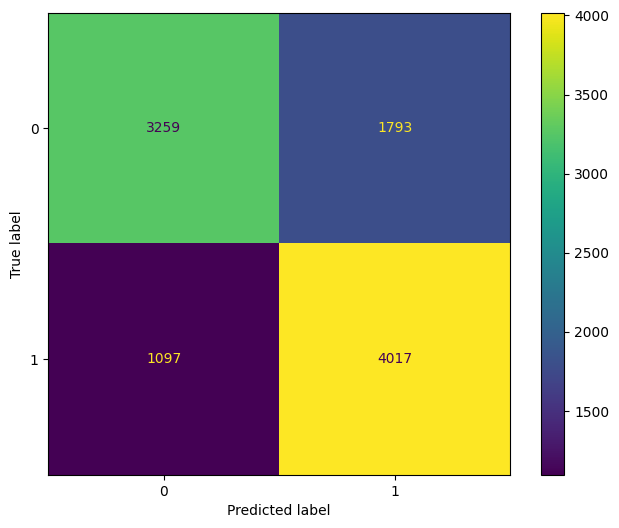

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_7 0.7158842190689324
Training accuracy of GaussianNB() at iteration number 7 is  0.7158842190689324
Testing accuracy of GaussianNB() at iteration number 7 is  0.7157190635451505
Cross validation mean accuracy of GaussianNB() at iteration number 7 is  0.7159299030099366
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      5052
           1       0.69      0.79      0.74      5114

    accuracy                           0.72     10166
   macro avg       0.72      0.72      0.71     10166
weighted avg       0.72      0.72      0.71     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 1.6245428458

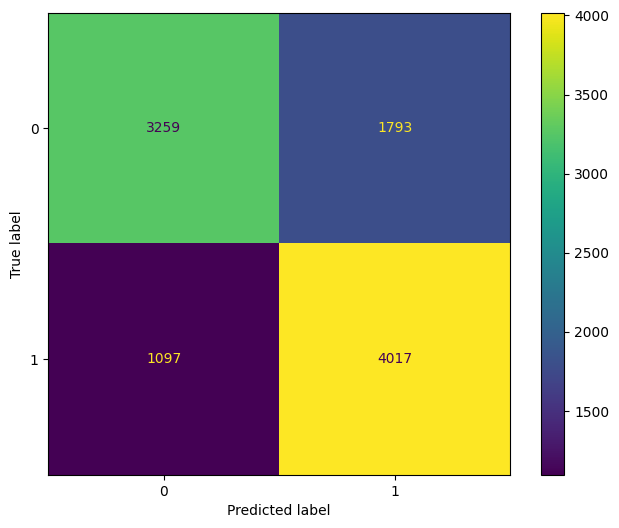

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_8 0.7158842190689324
Training accuracy of GaussianNB() at iteration number 8 is  0.7158842190689324
Testing accuracy of GaussianNB() at iteration number 8 is  0.7157190635451505
Cross validation mean accuracy of GaussianNB() at iteration number 8 is  0.7159299030099366
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      5052
           1       0.69      0.79      0.74      5114

    accuracy                           0.72     10166
   macro avg       0.72      0.72      0.71     10166
weighted avg       0.72      0.72      0.71     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 1.6245428458

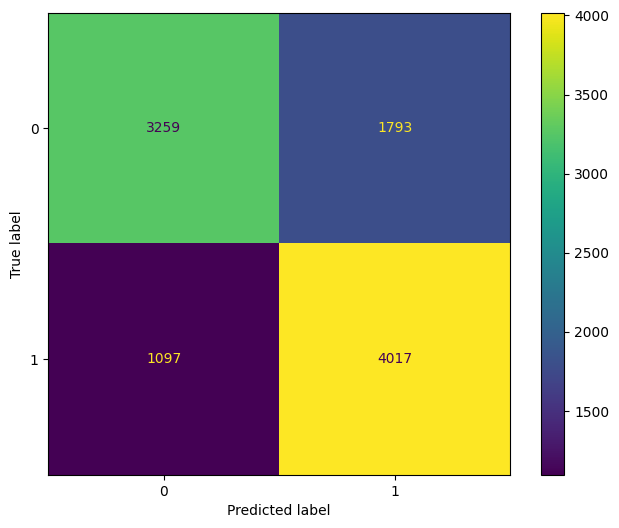

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_9 0.7158842190689324
Training accuracy of GaussianNB() at iteration number 9 is  0.7158842190689324
Testing accuracy of GaussianNB() at iteration number 9 is  0.7157190635451505
Cross validation mean accuracy of GaussianNB() at iteration number 9 is  0.7159299030099366
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      5052
           1       0.69      0.79      0.74      5114

    accuracy                           0.72     10166
   macro avg       0.72      0.72      0.71     10166
weighted avg       0.72      0.72      0.71     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 1.6245428458

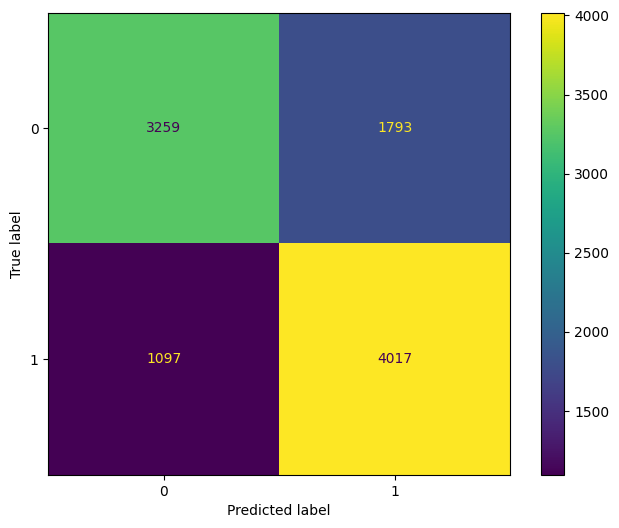

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_10 0.7158842190689324
Training accuracy of GaussianNB() at iteration number 10 is  0.7158842190689324
Testing accuracy of GaussianNB() at iteration number 10 is  0.7157190635451505
Cross validation mean accuracy of GaussianNB() at iteration number 10 is  0.7159299030099366
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      5052
           1       0.69      0.79      0.74      5114

    accuracy                           0.72     10166
   macro avg       0.72      0.72      0.71     10166
weighted avg       0.72      0.72      0.71     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7138500885303954, 0.7101200686106346, 1.4478237843041035, 0.0], 'DecisionTreeClassifier()': [0.7518984851465671, 0.750932373486968, 1.5129409288051234, 0.0], 'KNeighborsClassifier()': [0.7827070627582138, 0.7596996245306632, 1.62454

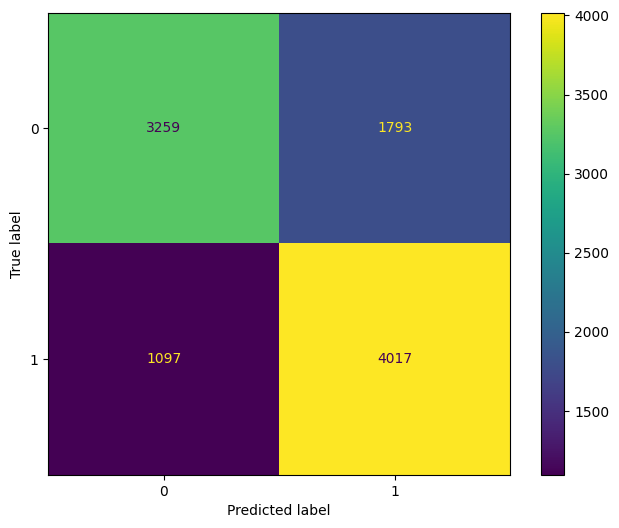

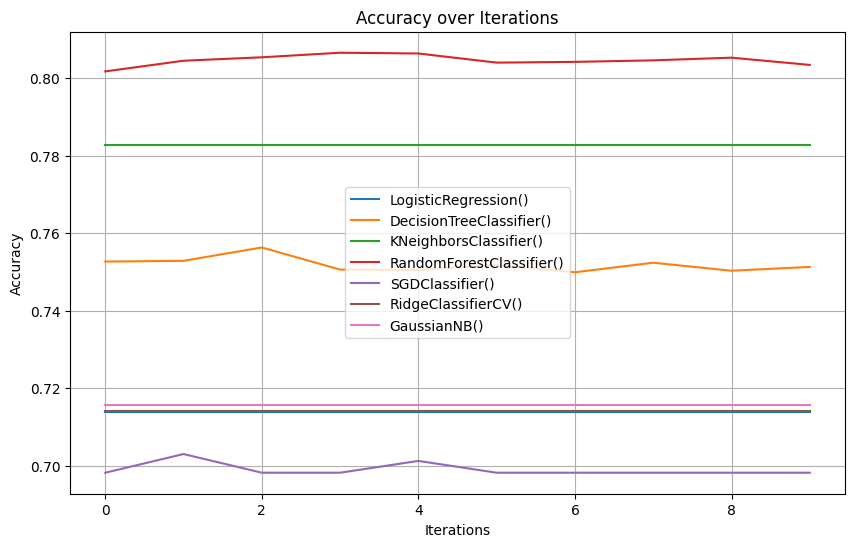

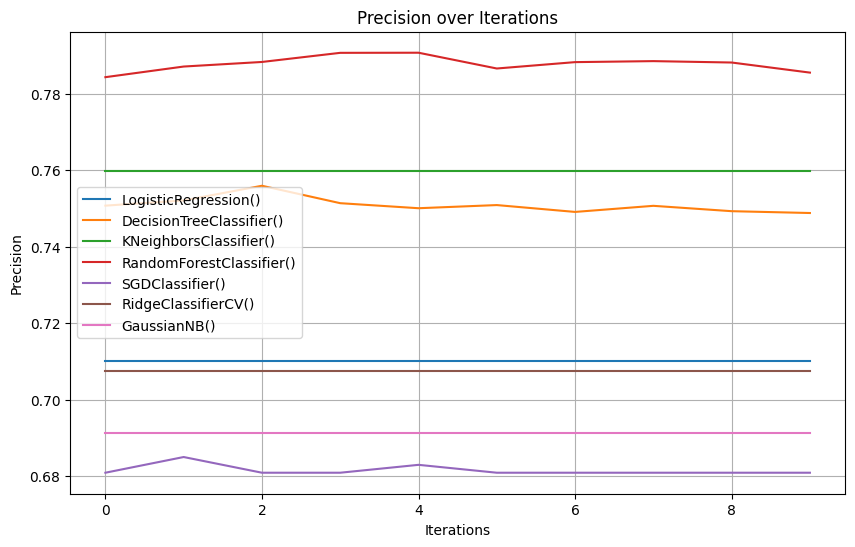

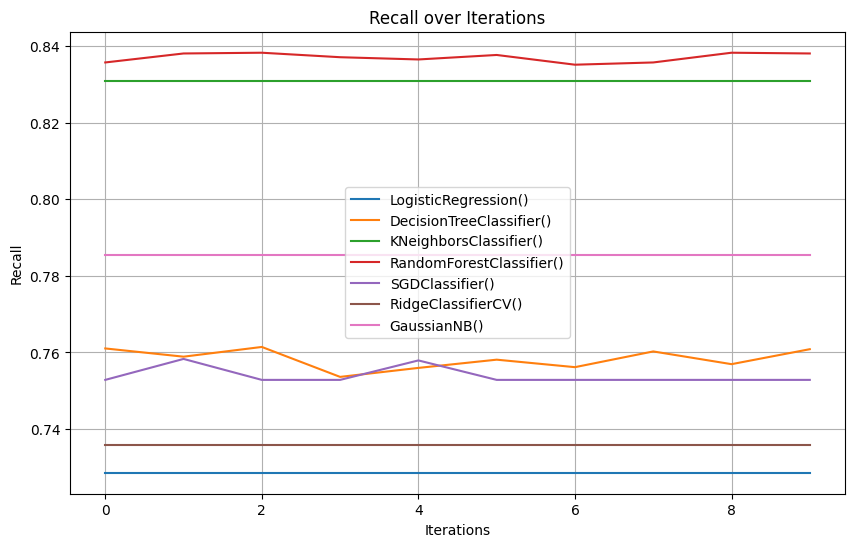

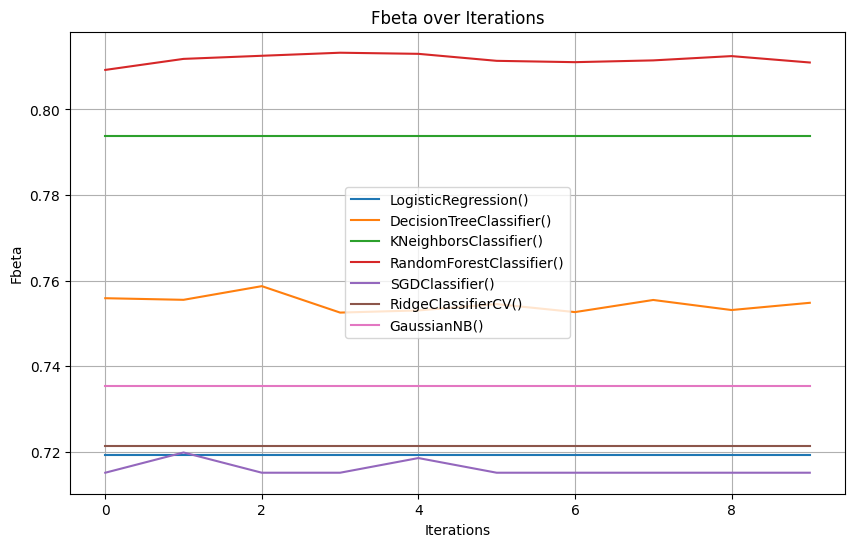

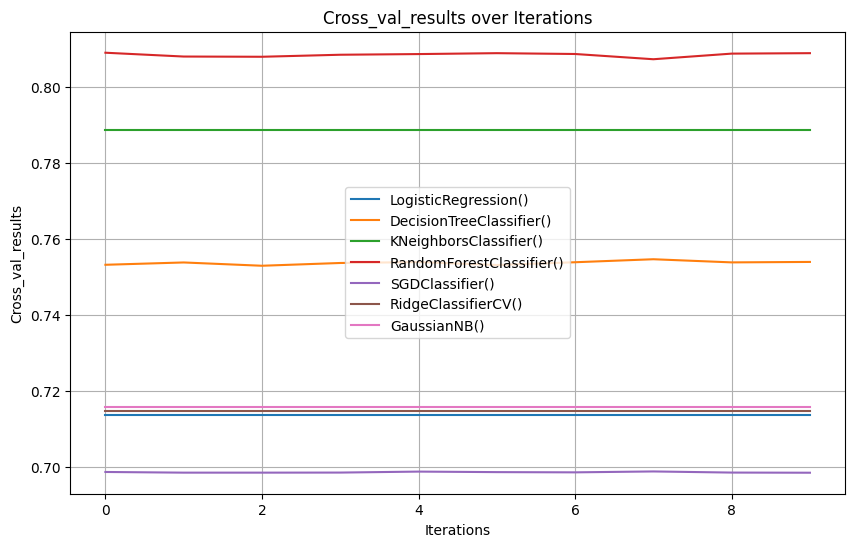

In [96]:
n_iter=10
# Perform algorithm testing and log metrics
with mlflow.start_run(run_name="logging_metrics2_MinMaxScaler", experiment_id=mlflow.get_experiment_by_name('PATH4').experiment_id) as run:
    for algo in algorithms_to_be_tested:
        for i in range(n_iter):
            algo_testing(algo=algo, test_size=0.2, X=X, Y=Y, evaluation_metric="accuracy_score", random_state=42, shuffle=True, iteration_number=i+1)

        
        # Calculate average metrics
        avg_accuracies[algo][0]/=n_iter
        avg_accuracies[algo][1]/=n_iter
        avg_accuracies[algo][2]/=n_iter
        avg_accuracies[algo][3]/=n_iter


    def plot_metrics(metrics_history, metric_name):
        fig_roc=plt.figure(figsize=(10, 6))
        for algo in algorithms_to_be_tested:
            plt.plot(metrics_history[algo][metric_name], label=algo)
        plt.xlabel('Iterations')
        plt.ylabel(metric_name.capitalize())
        plt.title(f'{metric_name.capitalize()} over Iterations')
        plt.legend()
        plt.grid(True)
        plt.savefig(f"{metric_name}_plot.png")
        plt.show()
        mlflow.log_figure(fig_roc, f"metrics/{metric_name}.png")
    
        # mlflow.log_artifact(f"{metric_name}_plot.png")
    
    # Generate and log plots for each metric
    for metric in ['accuracy', 'precision', 'recall', 'fbeta','cross_val_results']:
        plot_metrics(metrics_history, metric)
mlflow.end_run()

In [280]:
metrics_history

defaultdict(<function __main__.<lambda>()>,
            {'LogisticRegression()': defaultdict(list,
                         {'accuracy': [0.7114892779854417,
                           0.7114892779854417,
                           0.7114892779854417,
                           0.7114892779854417,
                           0.7114892779854417,
                           0.7114892779854417,
                           0.7114892779854417,
                           0.7114892779854417,
                           0.7114892779854417,
                           0.7114892779854417],
                          'precision': [0.7072012160364811,
                           0.7072012160364811,
                           0.7072012160364811,
                           0.7072012160364811,
                           0.7072012160364811,
                           0.7072012160364811,
                           0.7072012160364811,
                           0.7072012160364811,
                           0.